## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import re
from scipy.stats import gamma
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from mlxtend.frequent_patterns import apriori
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype

## Loading the data

In [2]:
df = pd.read_csv("DataAnalyst.csv")

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

## Viewing the dataframe

In [4]:
def disp(df):
    display(df.head())

    print("*"*56)
    print(f"Crashes Shape: {df.shape}")
    print("*"*56)

    info_df = pd.DataFrame()
    info_df['missing_val'] = df.isnull().sum()
    info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100)
    info_df['dtypes'] = df.dtypes
    
    display(info_df)

In [5]:
disp(df)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

********************************************************
Crashes Shape: (2253, 16)
********************************************************


missing_val  missing_val_ratio   dtypes
Unnamed: 0                   0           0.000000    int64
Job Title                    0           0.000000   object
Salary Estimate              0           0.000000   object
Job Description              0           0.000000   object
Rating                       0           0.000000  float64
Company Name                 1           0.044385   object
Location                     0           0.000000   object
Headquarters                 0           0.000000   object
Size                         0           0.000000   object
Founded                      0           0.000000    int64
Type of ownership            0           0.000000   object
Industry                     0           0.000000   object
Sector                       0           0.000000   object
Revenue                      0           0.000000   object
Competitors                  0           0.000000   object
Easy Apply                   0           0.000000   object

## Preparing the data

There are values in the data that is either -1, -1.0, or 1 in either string or number format. These values could indicate the missing values in our data.

In [6]:
df.replace(['-1.0', '-1', '1', -1], np.nan, inplace=True)

In [7]:
disp(df)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees   1961.0          Nonprofit Organization   
1        10000+ employees   1893.0          Nonprofit Organization   
2  1001 to 5000 employees   2003.0               Company - Private   
3    201 to 500 employees   2002.0  Subsidiary or Business Segment   
4   501 to 1000 employees   2009.0               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)         NaN       True  
1      $2 to $5 billion (USD)         NaN        NaN  
2    Unknown / Non-Applicable     GoDaddy        NaN  
3   $50 to $100 million (USD)         NaN        NaN  
4  $100 to $500 million (USD)  DraftKings       True

********************************************************
Crashes Shape: (2253, 16)
********************************************************


missing_val  missing_val_ratio   dtypes
Unnamed: 0                   0           0.000000    int64
Job Title                    0           0.000000   object
Salary Estimate              1           0.044385   object
Job Description              0           0.000000   object
Rating                     272          12.072792  float64
Company Name                 2           0.088771   object
Location                     0           0.000000   object
Headquarters               172           7.634265   object
Size                       163           7.234798   object
Founded                    660          29.294274  float64
Type of ownership          163           7.234798   object
Industry                   353          15.667998   object
Sector                     353          15.667998   object
Revenue                    163           7.234798   object
Competitors               1732          76.875277   object
Easy Apply                2173          96.449179   object

### Dropping unnecessary columns

In [8]:
df = df.drop(columns = ['Unnamed: 0','Competitors','Easy Apply','Industry'], axis = 1)  

### Change columns name 

In [9]:
columns = []
for col in df.columns:
    col_name = col.lower().split(' ')
    col_name = '_'.join(col_name)
    columns.append(col_name)
    
df.columns = columns
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'sector', 'revenue'],
      dtype='object')

### Handling missing values and unifying values

#### job_title values handling

In [10]:
df['job_title'].nunique()

1272

In [11]:
df['job_title'] = df['job_title'].apply(lambda x: x.split('-')[0].strip())
df['job_title'] = df['job_title'].apply(lambda x: x.split(',')[0].strip())

df['job_title'] = df['job_title'].replace(
                    ['Sr. Data Analyst', 'Sr Data Analyst', 'Data Analyst Senior', 'Senior Analyst','Sr Analyst','Sr. Analyst'], 'Senior Data Analyst')

df['job_title'] = df['job_title'].replace(
                    ['Jr. Data Analyst', 'Jr Data Analyst', 'Data Analyst Junior'], 'Junior Data Analyst')

df['job_title'] = df['job_title'].replace(
                    ['Data Analyst','Data Analyst ','Data Analyst I', 'Data Analyst II', 'Data Analyst III', 
                     'Data Analyst IV', 'Data Analyst V', 'Data Analyst 1',
                     'Data Analyst 2', 'Data Analyst 3', 'Data Analyst 4',
                     'Data Analyst 5', 'Analyst', 'Data Science Analyst'], 'Data Analyst', )

df['job_title']=df['job_title'].apply(lambda x:x.lower())
df.loc[df['job_title'].str.contains('business')==True,'job_title'] = 'Business Analyst' 
df['job_title']=df['job_title'].apply(lambda x :x.title())                              # make the first letters capital again

In [12]:
df['job_title'].nunique()

833

here we unified job_title as much as we can

#### salary_estimate values handling

In [13]:
df[df['salary_estimate'].isna()]

job_title salary_estimate  \
2149  Configuration/Data Management Analyst Iii             NaN   

                                        job_description  rating  \
2149  Job Description\nPosition Title: Configuration...     4.4   

         company_name  location  headquarters                 size  founded  \
2149  Protingent\n4.4  Kent, WA  Bellevue, WA  51 to 200 employees   2001.0   

      type_of_ownership             sector                   revenue  
2149  Company - Private  Business Services  $25 to $50 million (USD)

In [14]:
# using the same salary_estimate for the same company_name to fill the missing value
protingent_salary = df.loc[df['company_name'] == 'Protingent\n4.4' , 'salary_estimate'].tolist()[0]
df['salary_estimate'] = df['salary_estimate'].fillna(protingent_salary)

In [15]:
# Function to clean salary estimates
def clean_salary_estimate(salary):
    # Extract the numeric values using regex
    salary_range = re.findall(r'\d+', salary)
    # Join the values with a hyphen
    if len(salary_range) == 2:
        return f"{salary_range[0]} - {salary_range[1]}"
    return salary

# Apply the function to the Salary Estimate column in the dataframe
df['salary_estimate'] = df['salary_estimate'].apply(clean_salary_estimate)

# Display the cleaned salary estimates
df[['salary_estimate']].head()

salary_estimate
0         37 - 66
1         37 - 66
2         37 - 66
3         37 - 66
4         37 - 66

#### rating values handling

In [16]:
 x = df[['rating']]

In [17]:
# Generate a sample from a gamma distribution for unique companies with missing ratings
gamma_shape = 3.5
unique_companies_with_nan = df.loc[df['rating'].isna(), 'company_name'].unique()
gamma_size = len(unique_companies_with_nan)
data_gamma = gamma.rvs(a=gamma_shape, size=gamma_size)

# Scale the gamma distribution values to fit within the range [1, 5]
data_gamma_scaled = (data_gamma - data_gamma.min()) / (data_gamma.max() - data_gamma.min()) * 4 + 1

# Ensure the mean of the generated gamma sample is close to the existing ratings mean
existing_mean = df['rating'].mean()
scaling_factor = existing_mean / data_gamma_scaled.mean()
data_gamma_scaled = data_gamma_scaled * scaling_factor

# Clip the values to ensure they are within the range [1, 5]
data_gamma_scaled = np.clip(data_gamma_scaled, 1, 5)

# Create a dictionary to map company names to generated ratings
company_ratings = dict(zip(unique_companies_with_nan, data_gamma_scaled))

# Fill missing ratings based on company names
df['rating'] = df.apply(
    lambda row: company_ratings[row['company_name']] if pd.isna(row['rating']) else row['rating'],
    axis=1
)

# Round the ratings to one decimal place
df['rating'] = df['rating'].round(1)

here we used gamma distribution to keep the distrubition the same as before filling the data  

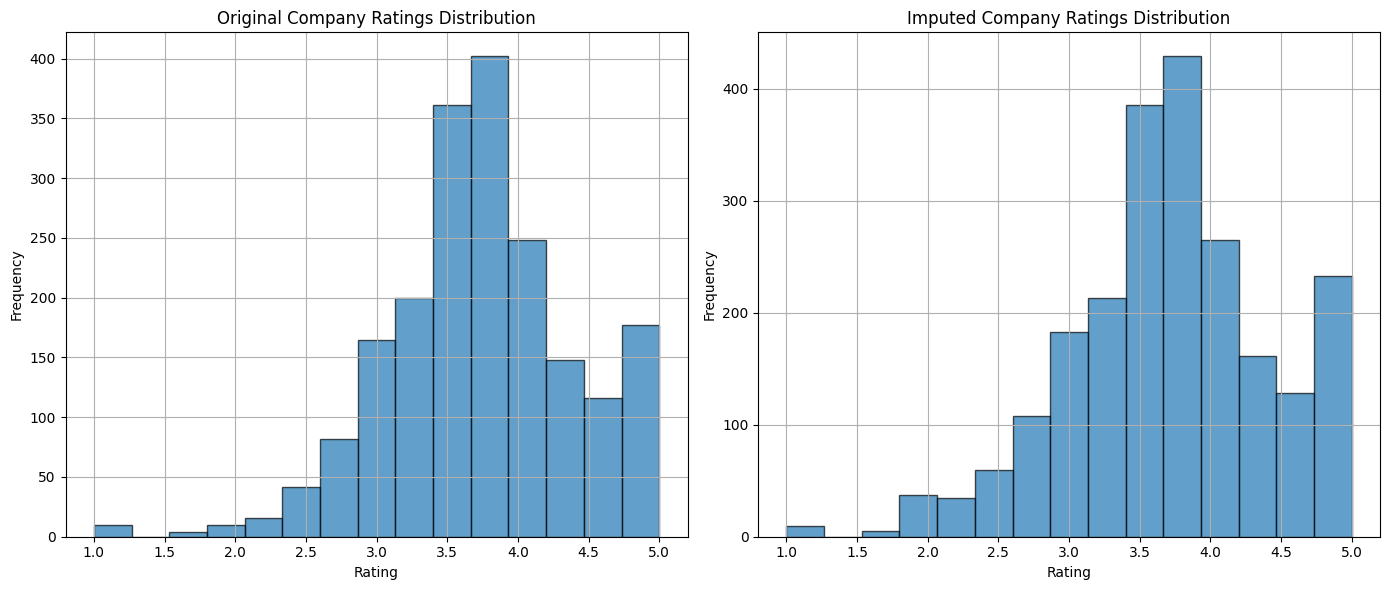

In [18]:
plt.figure(figsize=(14, 6))

# Original Ratings Distribution
plt.subplot(1, 2, 1)
plt.hist(x, bins=15, edgecolor='black', alpha=0.7)
plt.title('Original Company Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

# Imputed Ratings Distribution
plt.subplot(1, 2, 2)
plt.hist(df['rating'], bins=15, edgecolor='black', alpha=0.7)
plt.title('Imputed Company Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

#### company_name values handling

In [19]:
df[df['company_name'].isna()]

job_title salary_estimate  \
1352  Data Analyst         30 - 53   
1860  Data Analyst         53 - 99   

                                        job_description  rating company_name  \
1352  Job Description\nETL, SQL Queries, Data Modeli...     4.0          NaN   
1860  Kindred at Home, part of the Kindred at Home f...     4.0          NaN   

             location headquarters size  founded type_of_ownership sector  \
1352       Dallas, TX          NaN  NaN      NaN               NaN    NaN   
1860  Mooresville, NC          NaN  NaN      NaN               NaN    NaN   

     revenue  
1352     NaN  
1860     NaN

here we see that there are two missing values so we will remove these rows 

In [20]:
df = df.dropna(subset=['company_name'])

In [21]:
# cleaning the company_name from the rating 
df['company_name'] = df['company_name'].apply(lambda x: str(x).split('\n')[0])

#### location values handling

In [22]:
df[df['location'] == 'Greenwood Village, Arapahoe, CO'].head()

job_title salary_estimate  \
2168                        Data Support Analyst         57 - 67   
2178                             Bi/Data Analyst         57 - 67   
2186  Data Analyst/Data Engineer/Data Management         49 - 91   
2195                             It Data Analyst         49 - 91   
2220                 Mdg Functional Data Analyst        57 - 100   

                                        job_description  rating  \
2168  Greenwood Village, Colorado\nSkills : sql\nDes...     4.1   
2178  Job Description\n\n\nJob #: 1067357\n\nApex Sy...     3.8   
2186  Greenwood Village, Colorado\nSkills : SQL,ETL,...     4.1   
2195  Working at Century Communities means building ...     3.5   
2220  MDG Functional Data Analyst\nLocation: Greenwo...     5.0   

             company_name                         location  \
2168            Collabera  Greenwood Village, Arapahoe, CO   
2178         Apex Systems  Greenwood Village, Arapahoe, CO   
2186            Collabera  Greenwood Village, Arapahoe, CO   
2195  Century Communities  Greenwood Village, Arapahoe, CO   
2220      Georgia IT Inc.  Greenwood Village, Arapahoe, CO   

               headquarters                    size  founded  \
2168      Basking Ridge, NJ        10000+ employees   1991.0   
2178         Glen Allen, VA  1001 to 5000 employees   1995.0   
2186      Basking Ridge, NJ        10000+ employees   1991.0   
2195  Greenwood Village, CO   501 to 1000 employees   2002.0   
2220         Alpharetta, GA       1 to 50 employees      NaN   

                   type_of_ownership                              sector  \
2168               Company - Private              Information Technology   
2178  Subsidiary or Business Segment                   Business Services   
2186               Company - Private              Information Technology   
2195                Company - Public  Construction, Repair & Maintenance   
2220               Company - Private                                 NaN   

                               revenue  
2168  $500 million to $1 billion (USD)  
2178            $2 to $5 billion (USD)  
2186  $500 million to $1 billion (USD)  
2195  $500 million to $1 billion (USD)  
2220        Less than $1 million (USD)

here we will fix the "Greenwood Village, Arapahoe, CO" in location to "'Greenwood Village, CO"

In [23]:
df.loc[df['location'] == 'Greenwood Village, Arapahoe, CO', 'location'] = "Greenwood Village, CO"

#### headquarters values handling

In [24]:
df[df['headquarters'] == 'New York, NY (US), NY']

job_title salary_estimate  \
78       Data Analyst         51 - 88   
337  Business Analyst         42 - 74   

                                       job_description  rating  \
78   Job Description\nMulberry is disrupting a $40B...     5.0   
337  Position: Senior Business Intelligence & Data ...     2.5   

            company_name      location           headquarters  \
78   Mulberry Technology  New York, NY  New York, NY (US), NY   
337            CheckedUp  New York, NY  New York, NY (US), NY   

                  size  founded  type_of_ownership sector  \
78   1 to 50 employees      NaN  Company - Private    NaN   
337  1 to 50 employees      NaN  Company - Private    NaN   

                      revenue  
78   Unknown / Non-Applicable  
337  Unknown / Non-Applicable

In [25]:
df.loc[df['headquarters'] == 'New York, NY (US), NY', 'headquarters'] = 'New York, NY'

We see above values "New York, NY (US), NY" in headquarters we will fix it to "New York, NY"

In [26]:
df[df['headquarters'] == 'New York, 061']

job_title salary_estimate  \
944  Senior Data Analyst        74 - 123   

                                       job_description  rating  \
944  Job Description\nSmith Hanley Associates\nSeni...     4.5   

                company_name     location   headquarters               size  \
944  Smith Hanley Associates  Houston, TX  New York, 061  1 to 50 employees   

     founded  type_of_ownership             sector                   revenue  
944   1980.0  Company - Private  Business Services  Unknown / Non-Applicable

In [27]:
df.loc[df['headquarters'] == 'New York, 061', 'headquarters'] = 'New York, NY'

Here also we fixed "New York, 061" to "New York, NY"

In [28]:
df[df['headquarters'].isna()][['location','headquarters']].head()

location headquarters
11  Fairfield, NJ          NaN
34   New York, NY          NaN
55   New York, NY          NaN
68   New York, NY          NaN
90   New York, NY          NaN

here we'll assume that when the headquarters is NaN it will be the same as location and we'll fill accordingly 

In [29]:
df.loc[df['headquarters'].isna(), 'headquarters'] = df['location']

#### size values handling

In [30]:
df['size'].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown', nan], dtype=object)

here we will fill the size with Unknown 

In [31]:
df['size'] = df['size'].fillna('Unknown')

#### founded values handling

In [32]:
df['founded'].unique()

array([1961., 1893., 2003., 2002., 2009., 2014., 2001., 1914., 1896.,
       2013., 1841.,   nan, 1884., 2004., 2016., 1996., 1958., 2006.,
       1998., 1969., 2011., 2017., 2005., 1904., 2018., 1956., 2007.,
       1990., 1923., 2015., 1951., 1981., 2000., 1966., 1939., 1999.,
       1812., 1945., 1985., 1984., 1962., 1995., 2012., 1967., 1799.,
       1918., 1948., 1994., 1895., 1845., 1968., 2008., 1911., 1997.,
       1832., 1934., 1938., 1963., 1992., 1977., 1886., 1862., 1906.,
       1993., 1935., 1971., 1989., 1859., 1946., 1818., 1932., 1784.,
       1856., 1978., 1912., 1957., 1937., 1982., 1964., 1850., 1983.,
       1869., 1947., 1868., 1936., 1853., 2010., 1902., 1944., 1888.,
       1880., 1973., 1931., 1987., 2019., 1919., 1979., 1954., 1980.,
       1976., 1872., 1926., 1991., 1855., 1959., 1986., 1890., 1882.,
       1883., 1837., 1817., 1908., 1988., 1965., 1828., 1889., 1898.,
       1928., 1913., 1901., 1916., 1857., 1955., 1949., 1970., 1822.,
       1972., 1864.,

In [33]:
# Create a dictionary of known founded years by company_name
founded_dict = df.dropna(subset=['founded']).groupby('company_name')['founded'].first().to_dict()

# Function to fill NaN values based on the founded_dict
def fill_founded(row):
    if pd.isna(row['founded']):
        return founded_dict.get(row['company_name'], -1)
    else:
        return row['founded']

# Apply the function to fill NaN values
df['founded'] = df.apply(fill_founded, axis=1)

df['founded'] = df['founded'].astype('int64')  # Ensure the column is of integer type

#### type_of_ownership values handling

In [34]:
df['type_of_ownership'].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', nan, 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

here also we will fill the type_of_ownership with Unknown

In [35]:
df['type_of_ownership'] = df['type_of_ownership'].fillna('Unknown')

#### sector values handling

In [36]:
df['sector'].unique()

array(['Non-Profit', 'Health Care', 'Information Technology',
       'Arts, Entertainment & Recreation', 'Finance', 'Insurance',
       'Business Services', nan, 'Restaurants, Bars & Food Services',
       'Media', 'Accounting & Legal', 'Real Estate', 'Government',
       'Retail', 'Consumer Services', 'Biotech & Pharmaceuticals',
       'Education', 'Construction, Repair & Maintenance',
       'Oil, Gas, Energy & Utilities', 'Manufacturing',
       'Aerospace & Defense', 'Telecommunications',
       'Transportation & Logistics', 'Mining & Metals',
       'Travel & Tourism'], dtype=object)

In [37]:
df['sector'] = df['sector'].fillna('Unknown')

#### revenue values handling

In [38]:
df['revenue'].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       'Unknown / Non-Applicable', '$50 to $100 million (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)', nan,
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

In [39]:
df['revenue'] = df['revenue'].fillna('Unknown / Non-Applicable')

#### resetting the indexes

In [40]:
df.reset_index(drop=True, inplace=True)

### Feature Engineering 

#### extracting (min, max, average) salary from salary_estimate 

In [41]:
salary_list = df['salary_estimate'].apply(lambda x: x.split('-'))

df['min_salary'] = salary_list.apply(lambda x: x[0]).astype('int64')

df['max_salary'] = salary_list.apply( lambda x: x[1]).astype('int64')

df['average_salary'] = (df['min_salary'] + df['max_salary']) / 2

here we will make another column called average_salary_bin to put the average_salary in a category

In [42]:
# Define the bins and labels
bins = [0, 40, 70, np.inf]
labels = ['low', 'medium', 'high']

# Create the 'average_salary_bin' column
df['average_salary_bin'] = pd.cut(df['average_salary'], bins=bins, labels=labels, right=False)

#### extracting and creating skills and degrees Indices from the job_description

In [43]:
def extract_skills(df):
    
    skills_list = ['SQL', 'Excel', 'Tableau', 
              r'\br\b', 'Power BI', 'SAS', 
              'Word', 'PowerPoint', 'AWS', 
               'Python','Bachelor','Master']
    
    for skill in skills_list:
        if skill == r'\br\b':
            df['R'] = np.where(df['job_description'].apply(
                lambda x: x.lower().replace('\n', ' ').replace('  ', ' ')
            ).str.contains(skill), 1, 0).astype('int64')
        else:
            df[skill] = np.where(df['job_description'].apply(
                lambda x: x.lower().replace('\n', ' ').replace('  ', ' ')
            ).str.contains(skill.lower()), 1, 0).astype('int64')

extract_skills(df)
df['No_degree'] = ((df['Bachelor'] == 0) & (df['Master'] == 0)).astype('int64')

In [44]:
df.head()

job_title salary_estimate  \
0            Data Analyst         37 - 66   
1    Quality Data Analyst         37 - 66   
2     Senior Data Analyst         37 - 66   
3            Data Analyst         37 - 66   
4  Reporting Data Analyst         37 - 66   

                                     job_description  rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                         company_name      location  headquarters  \
0           Vera Institute of Justice  New York, NY  New York, NY   
1  Visiting Nurse Service of New York  New York, NY  New York, NY   
2                         Squarespace  New York, NY  New York, NY   
3                            Celerity  New York, NY    McLean, VA   
4                             FanDuel  New York, NY  New York, NY   

                     size  founded               type_of_ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                             sector                     revenue  min_salary  \
0                        Non-Profit  $100 to $500 million (USD)          37   
1                       Health Care      $2 to $5 billion (USD)          37   
2            Information Technology    Unknown / Non-Applicable          37   
3            Information Technology   $50 to $100 million (USD)          37   
4  Arts, Entertainment & Recreation  $100 to $500 million (USD)          37   

   max_salary  average_salary average_salary_bin  SQL  Excel  Tableau  R  \
0          66            51.5             medium    1      0        0  1   
1          66            51.5             medium    1      1        0  1   
2          66            51.5             medium    1      1        1  1   
3          66            51.5             medium    1      0        1  0   
4          66            51.5             medium    1      1        0  0   

   Power BI  SAS  Word  PowerPoint  AWS  Python  Bachelor  Master  No_degree  
0         0    0     0           0    1       1         0       0          1  
1         0    1     1           1    0       0         1       1          0  
2         0    0     0           0    0       1         1       1          0  
3         0    0     0           0    1       0         1       0          0  
4         0    0     0           0    0       1         1       0          0

#### split location and headquarters city and (country/state)

In [45]:
split = df['location'].str.split(',', expand=True)
df['job_city'] = split[0]
df['job_state'] = split[1].str.strip()

In [46]:
df['job_state'].unique()

array(['NY', 'NJ', 'UT', 'CA', 'VA', 'FL', 'IL', 'TX', 'AZ', 'PA', 'DE',
       'OH', 'NC', 'SC', 'IN', 'WA', 'GA', 'KS', 'CO'], dtype=object)

In [47]:
split = df['headquarters'].str.split(',', expand=True)
df['hq_city'] = split[0]
df['hq_state'] = split[1].str.strip()

In [48]:
df['hq_state'].unique()

array(['NY', 'VA', 'CT', 'United Kingdom', 'NJ', 'AZ', 'MA', 'CA',
       'Australia', 'MI', 'OH', 'PA', 'DC', 'WA', 'NC', 'IL', 'Ukraine',
       'MO', 'FL', 'France', 'CO', 'GA', 'Ireland', 'TX', 'Canada', 'KS',
       'MD', 'Singapore', 'India', 'KY', 'Switzerland', 'OK', 'Japan',
       'Portugal', 'TN', 'DE', 'Malta', 'IN', 'UT', 'AL', 'SC', 'WV',
       'South Korea', 'Taiwan', 'IA', 'VT', 'MN', 'MS', 'Norway', 'NH',
       'RI', 'AK', 'OR', 'NV', 'HI', 'ME', 'WI', 'Luxembourg', 'Finland',
       'NE', 'AR', 'Brazil', 'Germany', 'Cyprus', 'Netherlands', 'PR',
       'Austria', 'LA'], dtype=object)

#### making an age column from founded

In [49]:
# Replace -1 with NaN in the 'founded' column
df['founded'] = df['founded'].replace(-1, np.nan)

# Calculate the 'age' column
df['age'] = 2024 - df['founded']

# Replace NaN back with -1 in the 'age' column
df['founded'] = df['founded'].fillna(-1).astype('int64')
df['age'] = df['age'].fillna(-1).astype('int64')

after that we have made an "age" column we will make another column called "age_bin" to put the age in a category

In [50]:
# Define the bins and labels
bins = [-1, 0, 25, 75, np.inf]
labels = ['Unknown', 'new', 'old', 'very old']

# Create the 'age_bin' column
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

### outlier detection

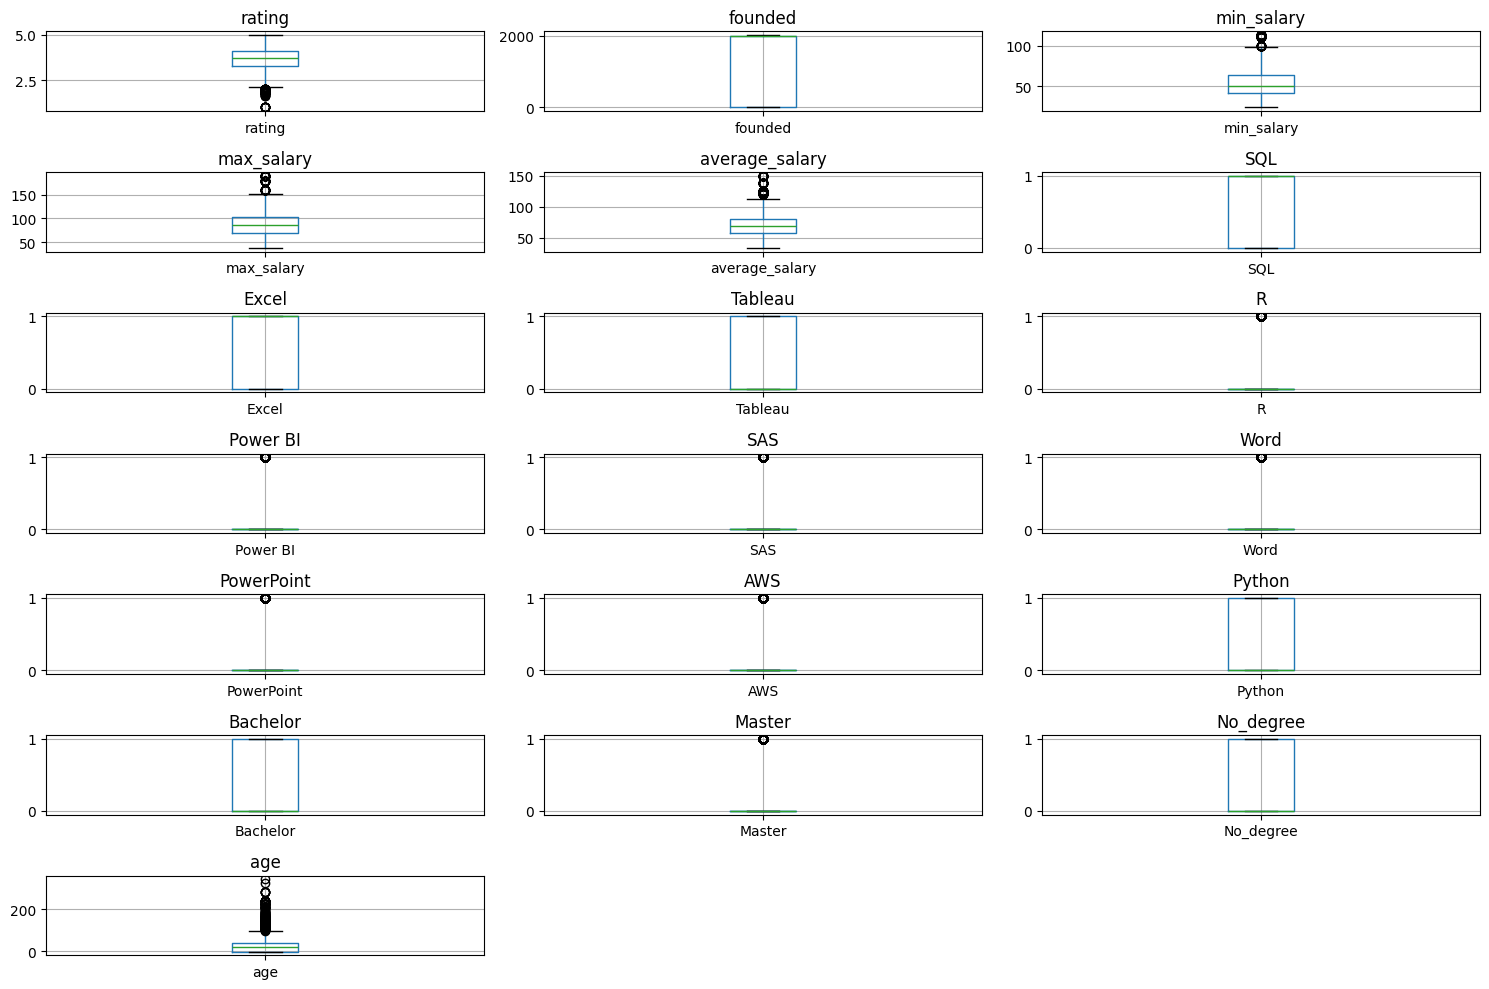

In [51]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [52]:
# Identify outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

# Apply the function to numerical columns
outliers = df[numerical_columns].apply(detect_outliers_iqr)

# Count the number of outliers in each column
outliers_sum = outliers.sum()
print(outliers_sum)

rating             52
founded             0
min_salary         86
max_salary         82
average_salary    139
SQL                 0
Excel               0
Tableau             0
R                 441
Power BI          180
SAS               411
Word              272
PowerPoint        194
AWS               275
Python              0
Bachelor            0
Master            498
No_degree           0
age               186
dtype: int64


here we detect what look like outliers in our data but we won't be doing anything to them because removing them could effect the natural variability in the data.

#### saving the to csv

In [53]:
df.to_csv('clean.csv', index=False)

## Analysis

In [54]:
df = pd.read_csv('clean.csv')

### Univariate analysis

#### numerical values

In [55]:
# Summary statistics for numerical columns
df.describe()

rating      founded   min_salary   max_salary  average_salary  \
count  2251.000000  2251.000000  2251.000000  2251.000000     2251.000000   
mean      3.704620  1404.204354    54.278543    89.996446       72.137494   
std       0.731444   899.371987    19.573024    29.312053       23.597327   
min       1.000000    -1.000000    24.000000    38.000000       33.500000   
25%       3.300000    -1.000000    41.000000    70.000000       58.000000   
50%       3.700000  1980.000000    50.000000    87.000000       69.000000   
75%       4.100000  2002.000000    64.000000   104.000000       80.500000   
max       5.000000  2019.000000   113.000000   190.000000      150.000000   

               SQL        Excel      Tableau            R     Power BI  \
count  2251.000000  2251.000000  2251.000000  2251.000000  2251.000000   
mean      0.616171     0.601066     0.275433     0.195913     0.079964   
std       0.486425     0.489788     0.446832     0.396990     0.271298   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               SAS         Word   PowerPoint          AWS       Python  \
count  2251.000000  2251.000000  2251.000000  2251.000000  2251.000000   
mean      0.182586     0.120835     0.086184     0.122168     0.282985   
std       0.386412     0.326008     0.280698     0.327552     0.450549   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Bachelor       Master    No_degree          age  
count  2251.000000  2251.000000  2251.000000  2251.000000  
mean      0.471790     0.221235     0.440693    32.066637  
std       0.499315     0.415171     0.496581    45.457780  
min       0.000000     0.000000     0.000000    -1.000000  
25%       0.000000     0.000000     0.000000    -1.000000  
50%       0.000000     0.000000     0.000000    20.000000  
75%       1.000000     0.000000     1.000000    38.000000  
max       1.000000     1.000000     1.000000   342.000000

In [56]:
def show_distribution(col):
    
    # Get statistics
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,med_val,mod_val,max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (15,10))

    # Plot the histogram   
    ax[0].hist(col)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('value', fontsize=10)

    # Add a title to the Figure
    fig.suptitle('Rating Distribution', fontsize=15)

def show_density(col):

    fig = plt.figure(figsize=(15,5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Rating Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label = 'Mode')
    plt.legend()

    # Show the figure
    plt.show()

Minimum:1.00
Mean:3.70
Median:3.70
Mode:5.00
Maximum:5.00



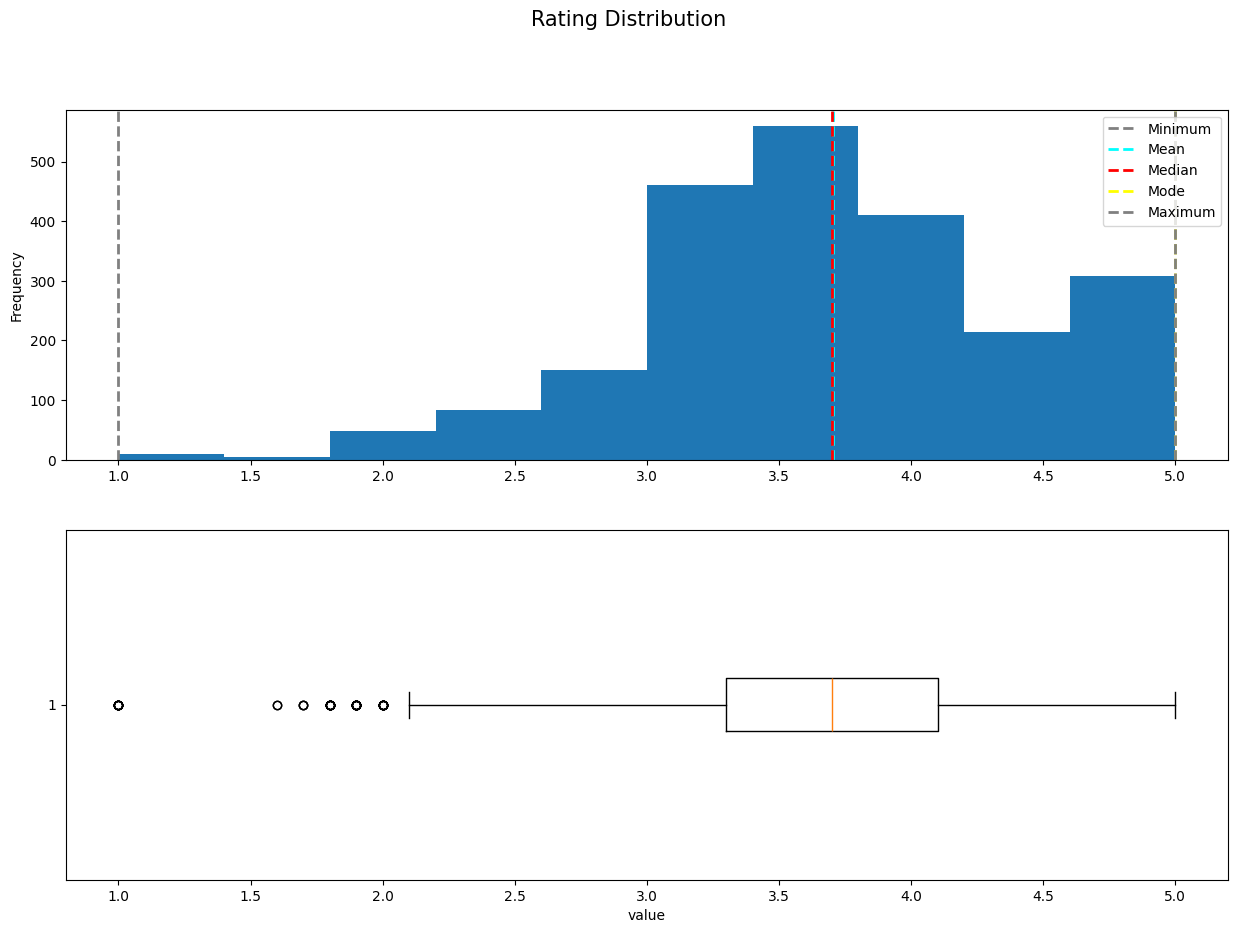

In [57]:
show_distribution(df['rating'])

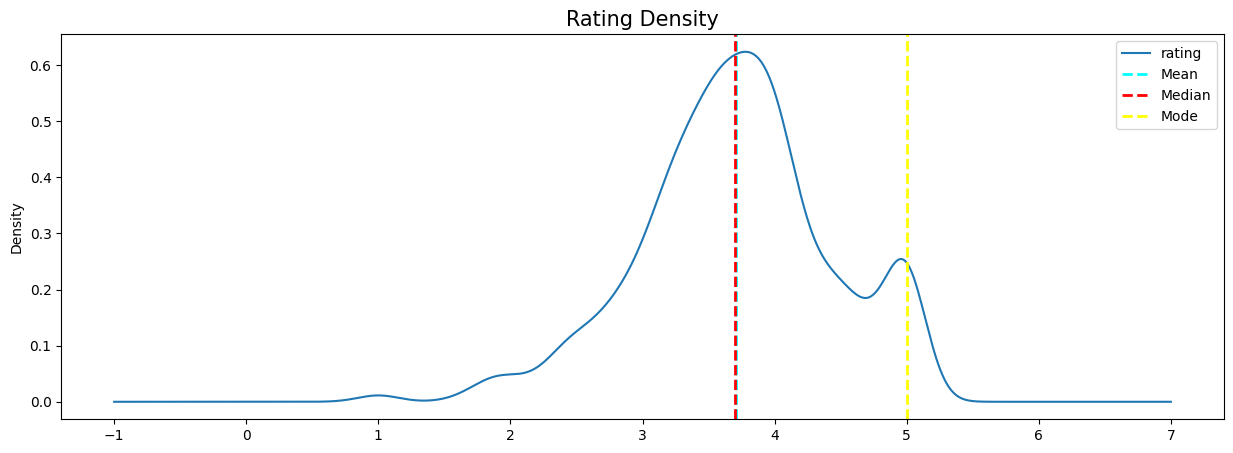

In [58]:
show_density(df['rating'])

The first set of plots includes a histogram and a box plot for the `rating` column. The histogram shows that most company ratings are clustered between 3.0 and 4.0, with a peak around 3.5, indicating that the majority of ratings are above average. The box plot below highlights the presence of outliers below 2.0, with a median rating around 3.5.

The second set of plots features another box plot and a density plot for the `rating` column. The box plot confirms the presence of outliers and shows a distribution with a median around 3.5. The density plot further illustrates this distribution, highlighting a prominent peak at approximately 3.5, with the mean, median, and mode closely aligned. This consistency indicates a generally positive rating trend among the companies.

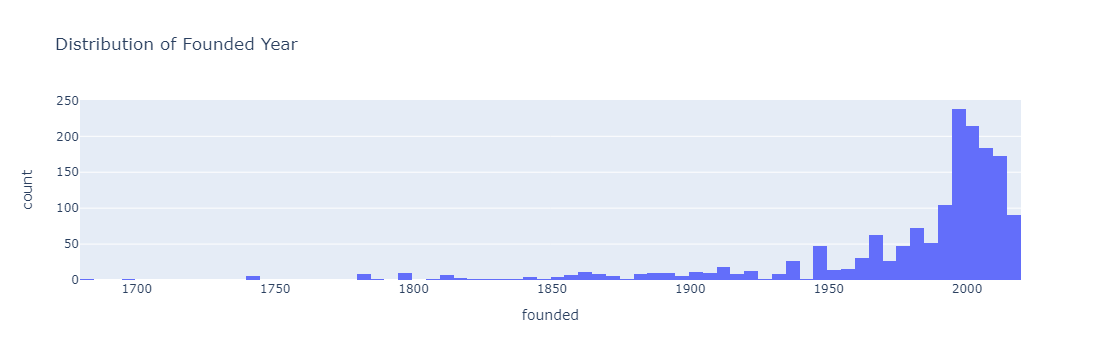

In [59]:
# Filter out -1 values in the 'founded' column
filtered_df = df[df['founded'] != -1]

# Plot the histogram for the 'founded' column
fig = px.histogram(filtered_df, x='founded', title='Distribution of Founded Year')
fig.show()

The histogram shows the distribution of company founding years, indicating that the majority of companies in the dataset were founded after 1950, with a significant increase in the number of companies founded around the year 2000. There are very few companies founded before 1900, suggesting a concentration of newer companies. The spike around 2000 may reflect a surge in new companies during the tech boom.

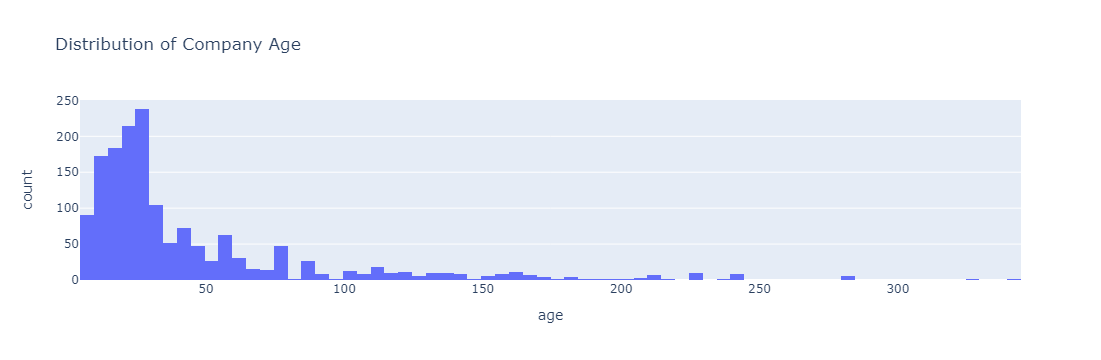

In [60]:
# Filter out -1 values in the 'founded' column
filtered_df = df[df['age'] != -1]

# Plot the histogram for the 'founded' column
fig = px.histogram(filtered_df, x='age', title='Distribution of Company Age')
fig.show()

The histogram shows the distribution of company ages, indicating that most companies are relatively young, with the highest concentration being between 0 to 50 years old. The frequency decreases sharply as age increases, with very few companies older than 100 years. This suggests that newer companies dominate the dataset, and there are significantly fewer long-established firms

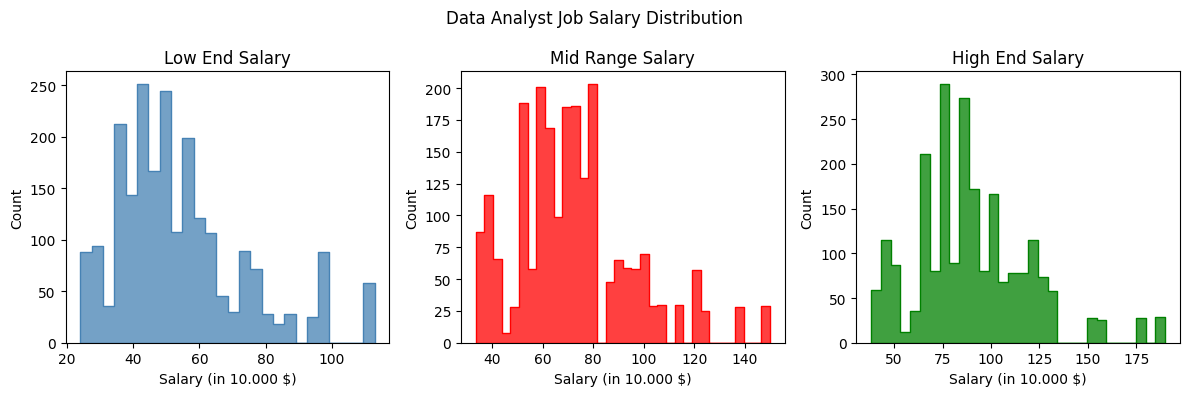

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

fig.suptitle('Data Analyst Job Salary Distribution')

sns.histplot(data=df, x='min_salary', element='step', ax=ax1, color='steelblue')
sns.histplot(data=df, x='average_salary', element='step', ax=ax2,color = 'red')
sns.histplot(data=df, x='max_salary', element='step', ax=ax3,color = 'green')

ax1.set_title('Low End Salary')
ax1.set_xlabel('Salary (in 10.000 $)')

ax2.set_title('Mid Range Salary')
ax2.set_xlabel('Salary (in 10.000 $)')

ax3.set_title('High End Salary')
ax3.set_xlabel('Salary (in 10.000 $)')

plt.tight_layout()
plt.show()

The plot shows the distribution of Data Analyst job salaries across three ranges: Low End, Mid Range, and High End. In the Low End Salary range, most salaries cluster around $40,000 - $50,000, while the Mid Range Salary shows a peak around $70,000 - $80,000. The High End Salary distribution indicates that most salaries are around $90,000 - $100,000, with fewer instances of salaries above $125,000.

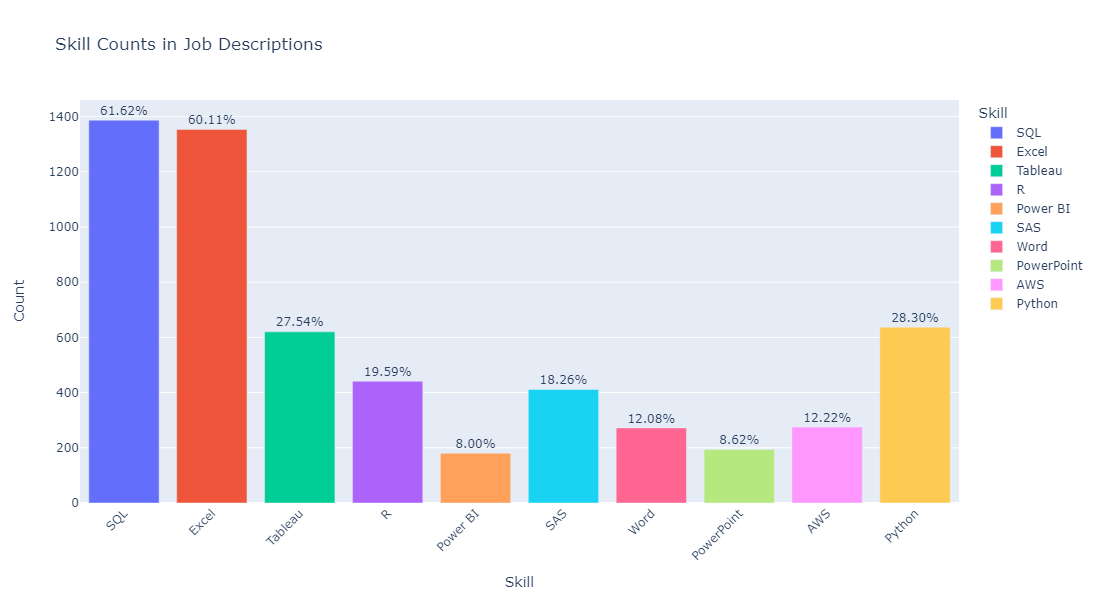

In [62]:
# List of skills to search for in job descriptions
skills_list = ['SQL', 'Excel', 'Tableau', r'\br\b', 'Power BI', 'SAS', 'Word', 'PowerPoint', 'AWS', 'Python']

# Create a dictionary to store the counts of each skill
skill_counts = {}

# Check for each skill in the job descriptions and count occurrences
for skill in skills_list:
    if skill == r'\br\b':
        skill_counts['R'] = df['job_description'].str.contains(skill, case=False, regex=True).sum()
    else:
        skill_counts[skill] = df['job_description'].str.contains(skill, case=False, regex=False).sum()

# Convert the dictionary to a DataFrame for plotting
skills_df = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Count'])

# Calculate the total number of job descriptions
total_job_descriptions = len(df)

# Calculate the percentage for each skill relative to the total number of job descriptions
skills_df['Percentage'] = (skills_df['Count'] / total_job_descriptions) * 100

# Plot the skill counts using Plotly with different colors for each skill
fig = px.bar(skills_df, x='Skill', y='Count', title='Skill Counts in Job Descriptions', color='Skill',
             color_discrete_sequence=px.colors.qualitative.Plotly, text='Percentage')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, width=1000, height=600)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Show the plot
fig.show()

The bar chart shows the frequency of specific skills mentioned in job descriptions. SQL and Excel are the most commonly required skills, each appearing in over 1,000 job descriptions. Other skills such as Tableau, R, and Python are also frequently mentioned, but less so than SQL and Excel, indicating a strong emphasis on these technical skills in job postings.

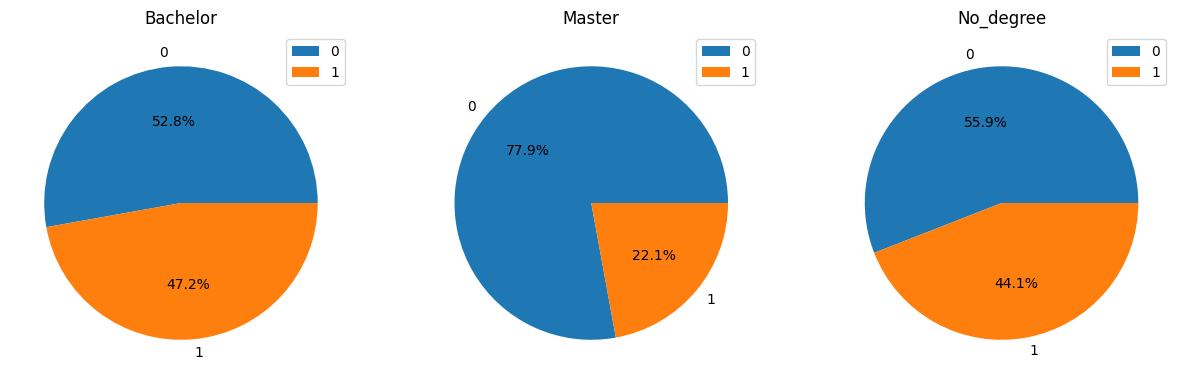

In [63]:
# Calculate the value counts for each degree type
bachelor_count = df['Bachelor'].value_counts()
master_count = df['Master'].value_counts()
no_degree = df['No_degree'].value_counts()

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

# Create pie charts
ax[0].pie(bachelor_count, labels=bachelor_count.index, autopct='%1.1f%%')
ax[0].set_title('Bachelor')
ax[0].legend(bachelor_count.index.tolist())

ax[1].pie(master_count, labels=master_count.index, autopct='%1.1f%%')
ax[1].set_title('Master')
ax[1].legend(master_count.index.tolist())

ax[2].pie(no_degree, labels=no_degree.index, autopct='%1.1f%%')
ax[2].set_title('No_degree')
ax[2].legend(no_degree.index.tolist())

# Show the figure
plt.show()

The pie charts illustrate the distribution of job requirements for Bachelor's, Master's, and no degree across job listings. Approximately 47.2% of job listings require a Bachelor's degree, while 22.1% require a Master's degree. Notably, 44.1% of job listings do not require any degree, suggesting that a significant portion of job opportunities are accessible without formal higher education credentials.

#### catigorical values

In [64]:
# Summary statistics for categorical columns
df.describe(include=['object'])

job_title salary_estimate  \
count           2251            2251   
unique           833              89   
top     Data Analyst         42 - 76   
freq             633              57   

                                          job_description  \
count                                                2251   
unique                                               2251   
top     Are you eager to roll up your sleeves and harn...   
freq                                                    1   

                            company_name      location  headquarters  \
count                               2251          2251          2251   
unique                              1500           253           496   
top     Staffigo Technical Services, LLC  New York, NY  New York, NY   
freq                                  58           310           227   

                       size  type_of_ownership                  sector  \
count                  2251               2251                    2251   
unique                    8                 14                      25   
top     51 to 200 employees  Company - Private  Information Technology   
freq                    421               1273                     570   

                         revenue average_salary_bin  job_city job_state  \
count                       2251               2251      2251      2251   
unique                        13                  3       249        19   
top     Unknown / Non-Applicable               high  New York        CA   
freq                         776               1074       310       626   

         hq_city hq_state age_bin  
count       2251     2251    2251  
unique       479       68       4  
top     New York       CA     old  
freq         227      512     664

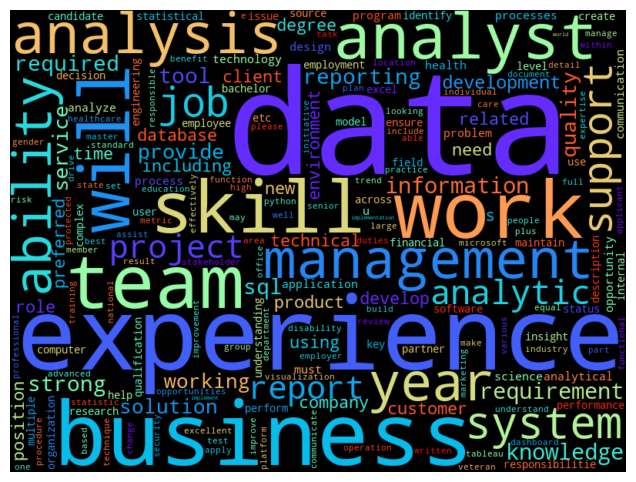

In [65]:
def job_desc_words_list(df):
    
    df['job_description'] = df['job_description'].apply(lambda x: x.lower())
    unique_chars = ['\n', '  ', ':', ',', '.', '(', ')', '[', ']', '-']
    
    for char in unique_chars:
        df['job_description'] = df['job_description'].apply(
            lambda x: x.replace(char, ' ')
        )
        
    return df['job_description']
job_desc_words = job_desc_words_list(df.copy())

stopwords = set(STOPWORDS)

job_desc_wordcloud = WordCloud(
    collocations=False,
    stopwords=stopwords,
    background_color = 'black', 
    width=800, 
    height=600,
    colormap='rainbow'
).generate(' '.join(job_desc_words))

plt.figure(figsize=(8,6))
plt.imshow(job_desc_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud highlights the most frequently mentioned terms in job_description, with larger words indicating higher frequency. Key terms such as "data," "experience," "business," "skills," and "team" suggest a strong emphasis on data-related expertise, practical experience, and teamwork in job requirements. This visualization indicates that job descriptions prioritize candidates with relevant experience and skills in data analysis and business operations.

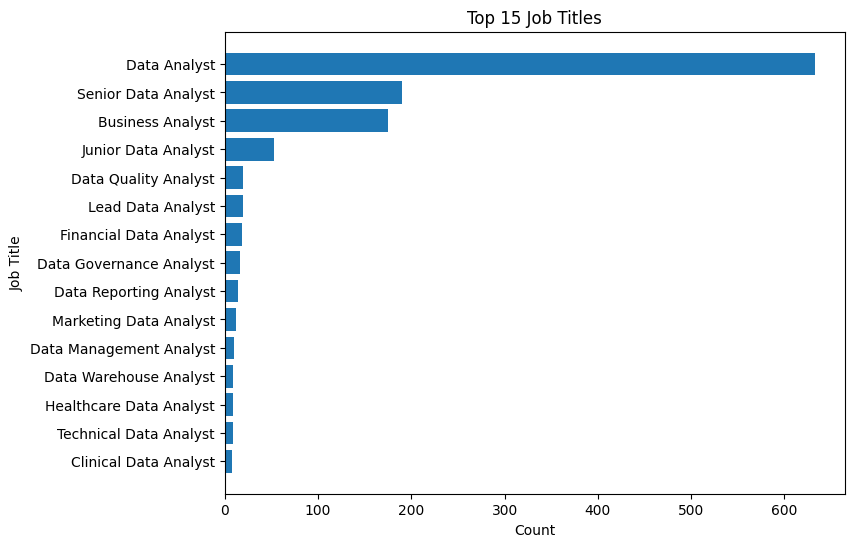

In [66]:
company_posts = df['job_title'].value_counts()[:15].sort_values()

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(company_posts.index, company_posts.values)
ax.set_title('Top 15 Job Titles')
ax.set_xlabel('Count')
ax.set_ylabel('Job Title')
plt.show()

Here we see that Data Analyst is the most job title

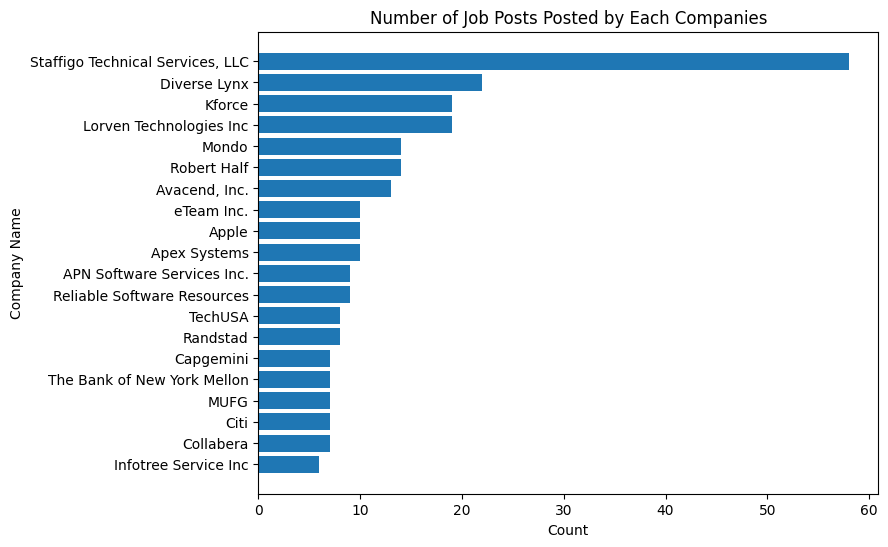

In [67]:
company_posts = df['company_name'].value_counts()[:20].sort_values()

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(company_posts.index, company_posts.values)
ax.set_title('Number of Job Posts Posted by Each Companies')
ax.set_xlabel('Count')
ax.set_ylabel('Company Name')

plt.show()

Staffigo Technical Services, LLC posts the most data analyst job posts in the data.

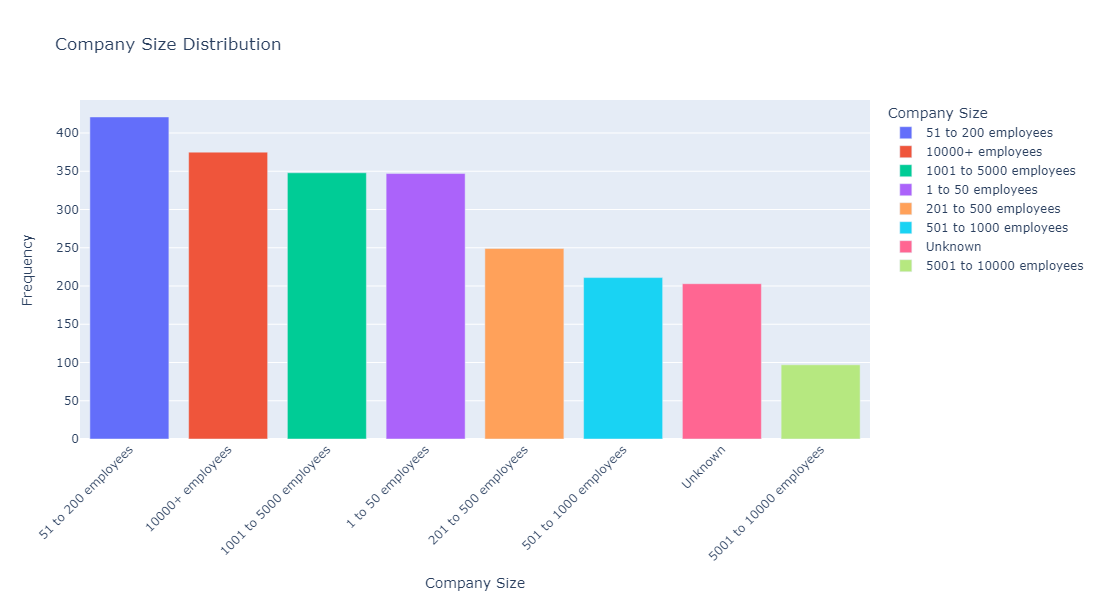

In [68]:
# Count the occurrences of each size category
size_counts = df['size'].value_counts().reset_index()
size_counts.columns = ['size', 'count']

# Plot the size counts using Plotly
fig = px.bar(size_counts, x='size', y='count', title='Company Size Distribution',
             labels={'size': 'Company Size', 'count': 'Frequency'},
             color='size', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, width=1000, height=600)

# Show the plot
fig.show()


The bar chart shows the distribution of company sizes, with the majority of companies having between 51 to 200 employees, followed closely by companies with over 10,000 employees. Mid-sized companies, such as those with 1001 to 5000 employees and 1 to 50 employees, also have significant representation. The category with the fewest companies is 5001 to 10000 employees, indicating a lower presence of companies within this size range.

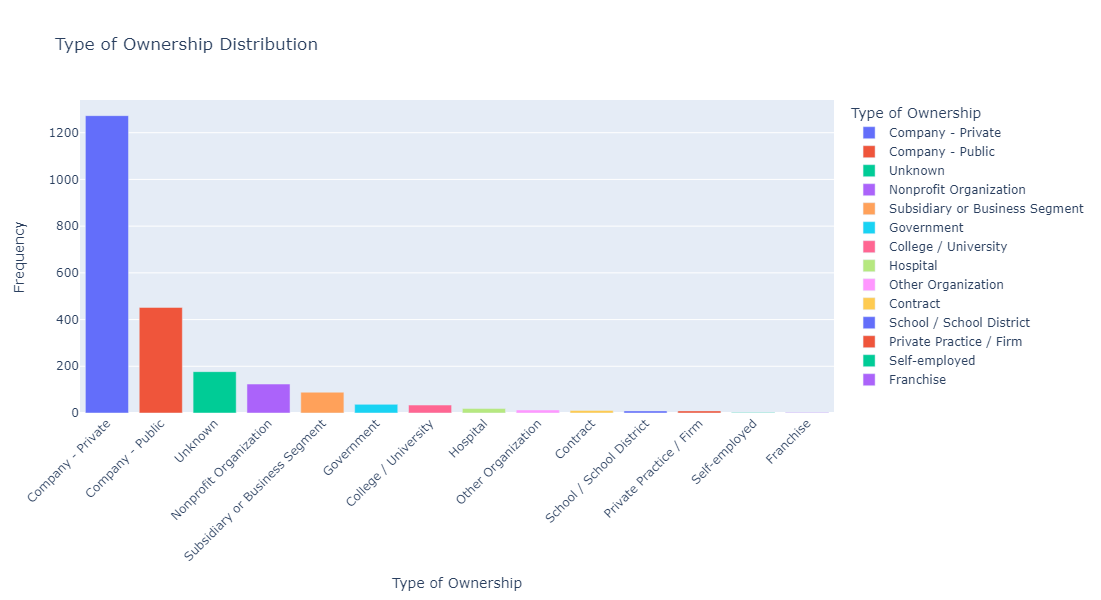

In [69]:
# Count the occurrences of each type of ownership
ownership_counts = df['type_of_ownership'].value_counts().reset_index()
ownership_counts.columns = ['type_of_ownership', 'count']

# Plot the type of ownership counts using Plotly
fig = px.bar(ownership_counts, x='type_of_ownership', y='count', title='Type of Ownership Distribution',
             labels={'type_of_ownership': 'Type of Ownership', 'count': 'Frequency'},
             color='type_of_ownership', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, width=1000, height=600)

# Show the plot
fig.show()

The bar chart shows the distribution of different types of ownership among companies, with the majority being private companies, which account for over 1200 entries. Public companies are the second most common, followed by a notable number of entries categorized as "Unknown" and "Nonprofit Organization." Other types of ownership, such as subsidiaries, government, and educational institutions, have significantly fewer entries.

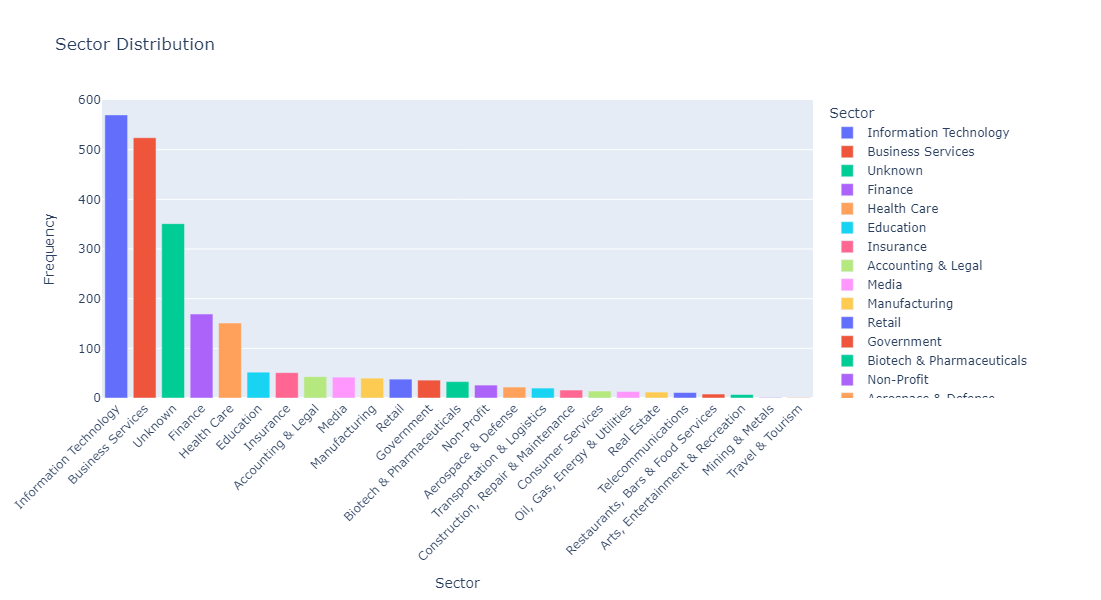

In [70]:
# Count the occurrences of each sector
sector_counts = df['sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'count']

# Plot the sector counts using Plotly
fig = px.bar(sector_counts, x='sector', y='count', title='Sector Distribution',
             labels={'sector': 'Sector', 'count': 'Frequency'},
             color='sector', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, width=1000, height=600)

# Show the plot
fig.show()

The bar chart displays the distribution of sectors among companies, with Information Technology and Business Services being the most prevalent, each having over 500 entries. The "Unknown" category also has a significant number of entries, indicating incomplete data for many companies. Other sectors like Finance, Health Care, and Education are represented to a lesser extent, while numerous smaller sectors show much lower frequencies.

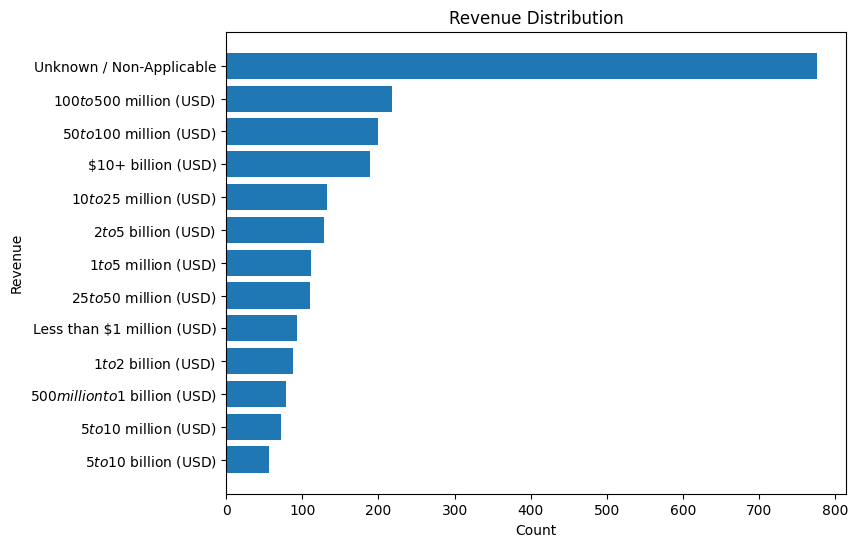

In [71]:
company_posts = df['revenue'].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(company_posts.index, company_posts.values)
ax.set_title('Revenue Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Revenue')

plt.show()

The bar chart illustrates the distribution of companies' revenue, showing that the majority have unknown or non-applicable revenue, followed by companies earning between 100 to 500 million USD and 50 to 100 million USD. High-revenue companies (10+ billion USD) and mid-revenue ranges like 10 to 25 million USD also have significant representations. Lower-revenue categories, such as those earning less than 1 million USD, have fewer entries, indicating a lesser presence of small-scale companies in the dataset.

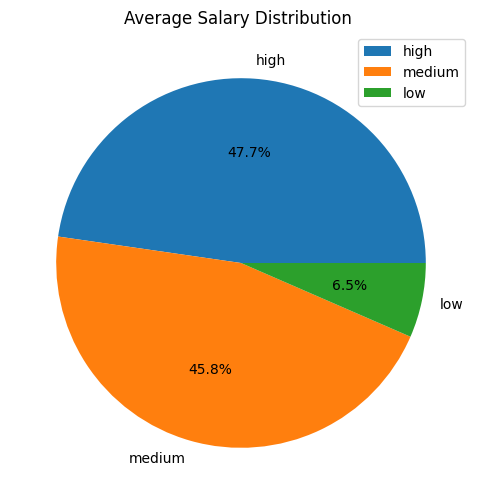

In [72]:
# Calculate the value counts for each degree type
salary_count = df['average_salary_bin'].value_counts()

# Create subplots
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(salary_count, labels=salary_count.index, autopct='%1.1f%%')
ax.set_title('Average Salary Distribution ')
ax.legend(salary_count.index.tolist())
# Show the figure
plt.show()

The pie chart illustrates the distribution of average salaries, showing that nearly half (47.7%) of the entries fall into the high salary category. The medium salary category is slightly less prevalent, representing 45.8% of the entries. The low salary category is the least common, accounting for only 6.5% of the entries, indicating that most jobs offer medium to high average salaries.

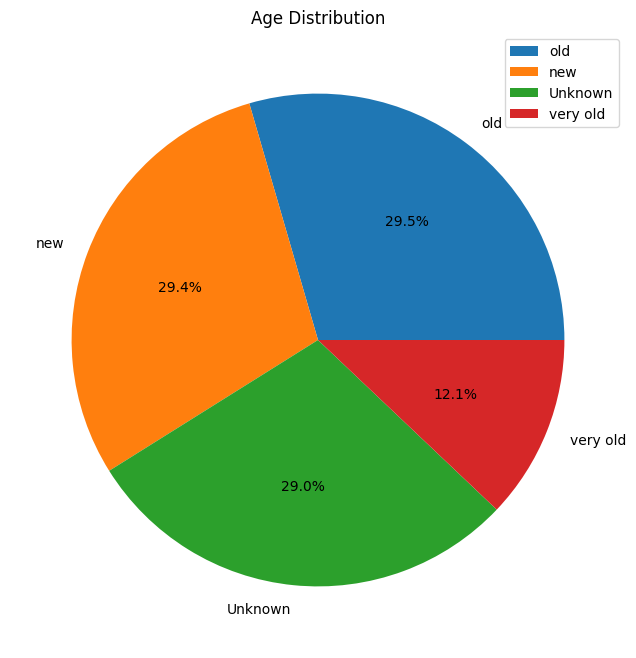

In [73]:
# Calculate the value counts for each degree type
age_count = df['age_bin'].value_counts()

# Create subplots
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(age_count, labels=age_count.index, autopct='%1.1f%%')
ax.set_title('Age Distribution')
ax.legend(age_count.index.tolist())
# Show the figure
plt.show()

The pie chart illustrates the distribution of company ages, with "old" and "new" companies each comprising nearly 30% of the dataset. The "Unknown" category also represents a significant portion at 29%, indicating incomplete age data for many companies. "Very old" companies make up 12.1%, highlighting that a smaller fraction of companies have been established for a long time.

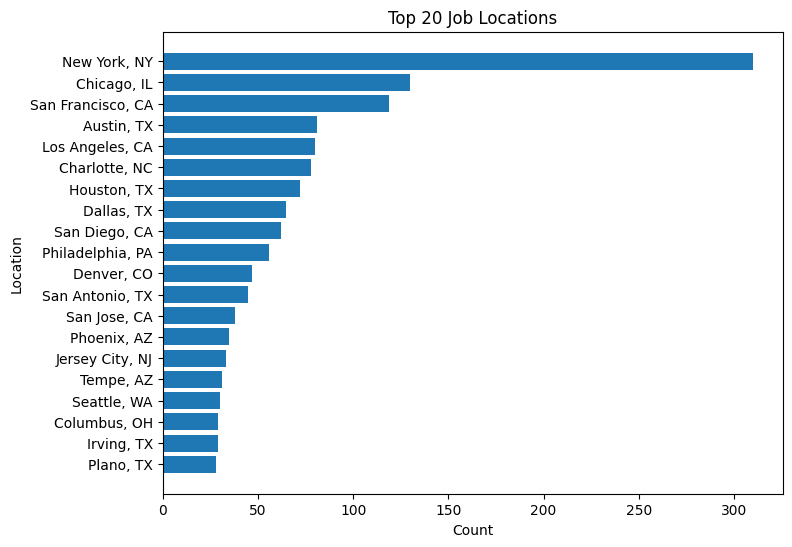

In [74]:
location_count = df['location'].value_counts()[:20].sort_values()

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(location_count.index, location_count.values)
ax.set_title('Top 20 Job Locations')
ax.set_xlabel('Count')
ax.set_ylabel('Location')

plt.show()

New York by far has the most job offerings

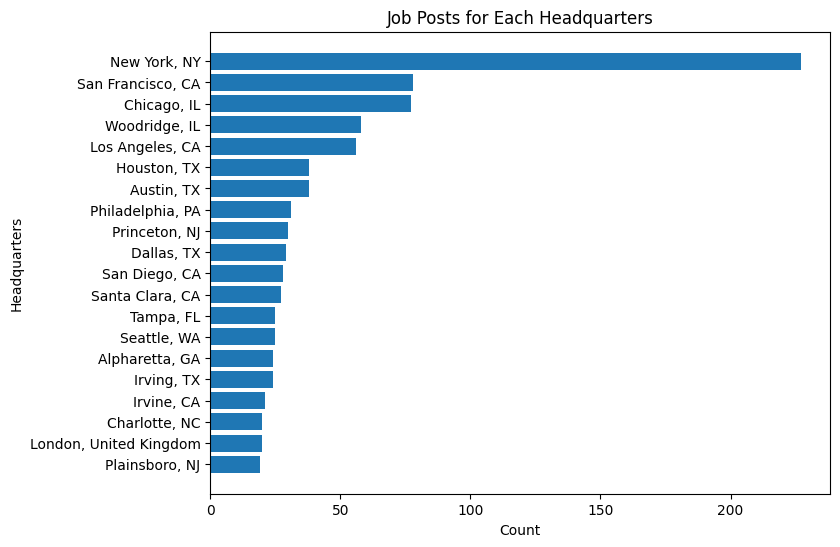

In [75]:
headquarters_count = df['headquarters'].value_counts()[:20].sort_values()

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(headquarters_count.index, headquarters_count.values)
ax.set_title('Job Posts for Each Headquarters')
ax.set_xlabel('Count')
ax.set_ylabel('Headquarters')

plt.show()

New York by far has the most Headquarters

### Bivariate analysis

In [76]:
req = df.iloc[:,16:26]                                           

req_bool = req.astype(bool)
df_apriori = apriori(req_bool, min_support=0.002, use_colnames=True)

df_apriori['length'] =  df_apriori.itemsets.apply(lambda x: len(x))  

In this code here we selected relevant columns the we did Boolean conversion on them.
Then the Apriori algorithm is applied to find frequent itemsets (common combinations of skills) with a minimum support of 0.2%.
Then a new column length is added to the result to indicate the number of items in each frequent itemse

In [77]:
in_demand_duos = df_apriori[df_apriori.length ==2].sort_values('support',ascending=False)
in_demand_duos.head(5)

# here we extract the itemsets of length 2 

support          itemsets  length
10  0.394047      (SQL, Excel)       2
18  0.249223     (SQL, Python)       2
11  0.235895    (SQL, Tableau)       2
19  0.180809  (Tableau, Excel)       2
26  0.167037   (Excel, Python)       2

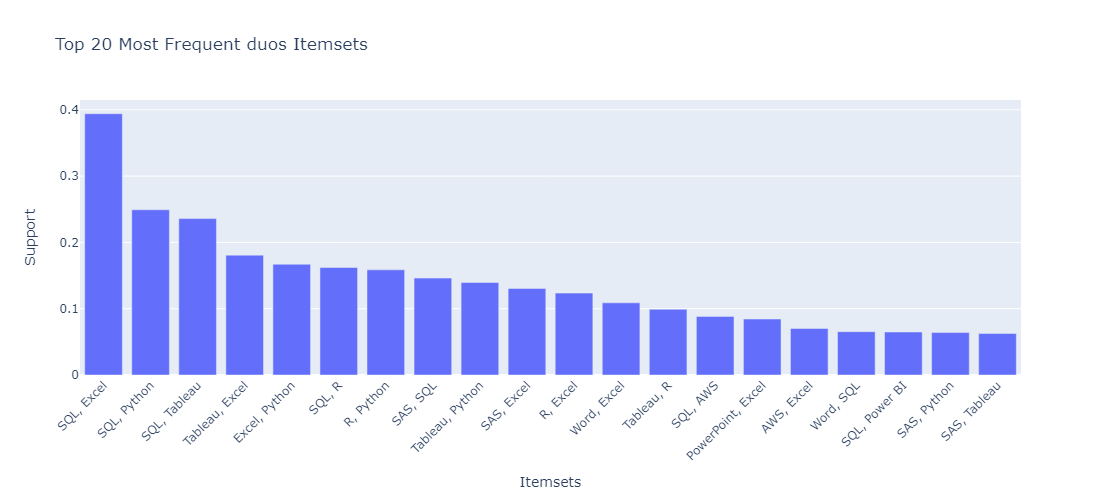

In [78]:
# Convert itemsets from frozensets to strings for better visualization
in_demand_duos['itemsets'] = in_demand_duos['itemsets'].apply(lambda x: ', '.join(list(x)))

# Create the bar plot using Plotly
fig = px.bar(in_demand_duos.head(20), x='itemsets', y='support', 
             title='Top 20 Most Frequent duos Itemsets',
             labels={'itemsets': 'Itemsets', 'support': 'Support'},
             width=1000, height=500)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

The bar plot illustrates the top 20 most frequent itemsets of skills required in job postings, with "Excel and SQL" being the most common combination, appearing in nearly 40% of the postings. Other prevalent combinations include "Python and SQL," "Tableau and SQL," and "Excel and Tableau," each with significant support values. The plot highlights the importance of specific skill combinations, particularly those involving Excel, SQL, and Python, in the job market.

In [79]:
in_demand_trios = df_apriori[df_apriori.length ==3].sort_values('support',ascending=False)
in_demand_trios.head(5)

# here we extract the itemsets of length 3

support                itemsets  length
55  0.152821   (SQL, Excel, Tableau)       3
62  0.151488    (SQL, Excel, Python)       3
75  0.142159        (R, SQL, Python)       3
69  0.130609  (SQL, Python, Tableau)       3
58  0.107064       (SAS, SQL, Excel)       3

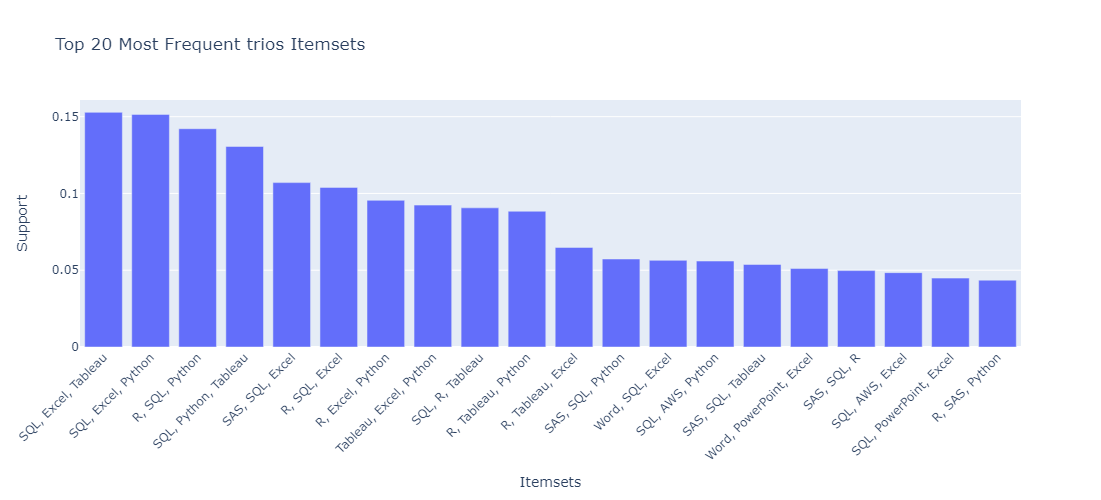

In [80]:
# Convert itemsets from frozensets to strings for better visualization
in_demand_trios['itemsets'] = in_demand_trios['itemsets'].apply(lambda x: ', '.join(list(x)))

# Create the bar plot using Plotly
fig = px.bar(in_demand_trios.head(20), x='itemsets', y='support', 
             title='Top 20 Most Frequent trios Itemsets',
             labels={'itemsets': 'Itemsets', 'support': 'Support'},
             width=1000, height=500)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

The bar plot shows the top 20 most frequent itemsets of skills required in job postings, with "Excel, Tableau, and SQL" being the most common combination, appearing in about 15% of the postings. Other notable combinations include "Excel, Python, SQL," "R, Python, SQL," and "Excel, SAS, SQL." The plot highlights the high demand for specific combinations of data-related skills, particularly those involving Excel, SQL, Python, Tableau, and R.

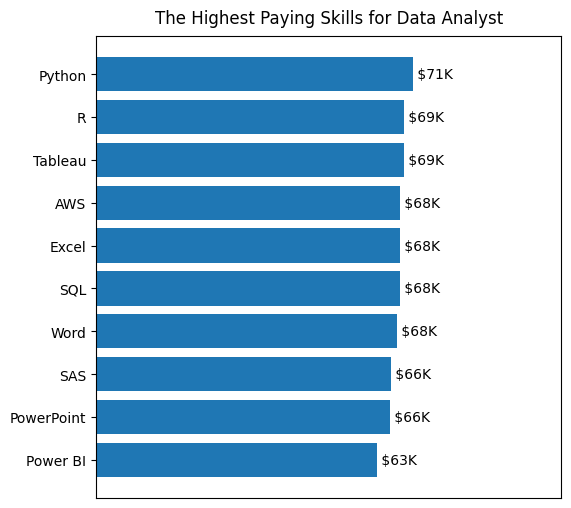

In [81]:
def skills_salary(df):
    
    cols = 'SQL, Excel, Tableau, R, Power BI, SAS, Word, PowerPoint, AWS, Python'
    cols = cols.split(', ')
    
    for col in cols:
        df[col] = np.where(df[col] == 1, df['average_salary'], np.nan)
        
    return df[cols]

skills_salary_df = skills_salary(df.copy())

skills_salary_avg = skills_salary_df.apply(np.nanmedian).sort_values()

fig, ax = plt.subplots(figsize=(6,6))

bars = ax.barh(skills_salary_avg.index,
       skills_salary_avg.values)

ax.bar_label(bars, fmt=' $%dK')

ax.set_title('The Highest Paying Skills for Data Analyst', y=1.01)

ax.set_xticks([])
ax.set_xlim(right=105)

plt.show()

The bar chart shows the highest paying skills for Data Analysts, with Python leading at an average salary of 71K. Skills like R and Tableau follow closely at 69K, while other essential tools like AWS, Excel, SQL, Word, and SAS offer average salaries around 68K. PowerPoint and Power BI, though still valuable, have slightly lower average salaries at 66K and 63K, respectively.

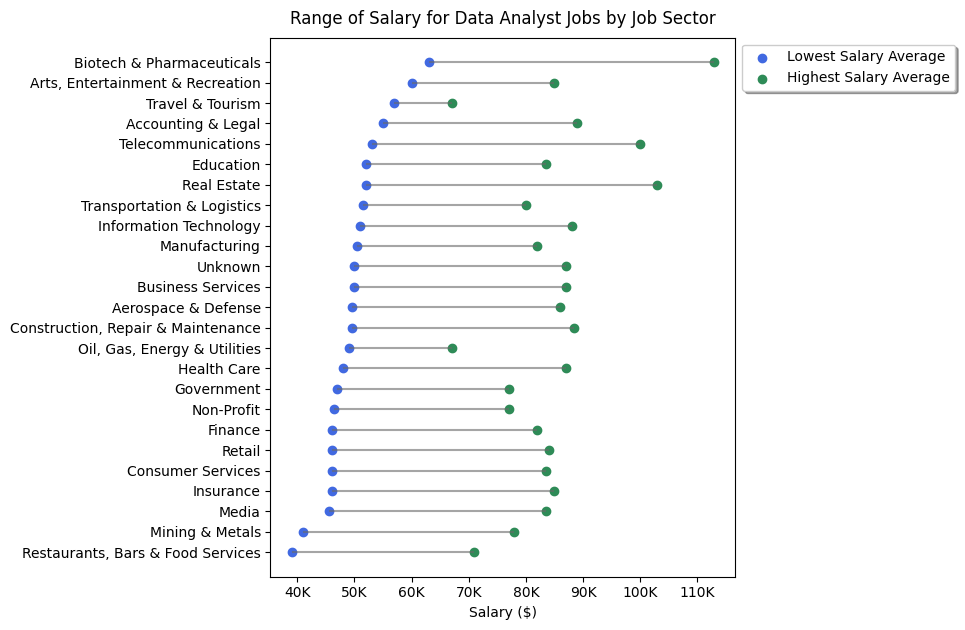

In [82]:
top_salary_sector = df.groupby('sector').agg(lowest_salary_avg = ('min_salary', 'median'),highest_salary_avg = ('max_salary', 'median'),).sort_values('lowest_salary_avg', ascending=False)

fig, ax = plt.subplots(figsize=(6,7))

my_range=range(1, len(top_salary_sector.index) + 1)

ax.hlines(y=my_range, xmin='lowest_salary_avg', xmax='highest_salary_avg', 
          data=top_salary_sector, color='dimgrey', alpha=0.6)

ax.scatter(top_salary_sector['lowest_salary_avg'], my_range, 
           color='royalblue', 
           label='Lowest Salary Average')
ax.scatter(top_salary_sector['highest_salary_avg'], my_range, 
           color='seagreen',
           label='Highest Salary Average')

ax.set_xticks(range(40, 111, 10), [str(num) + 'K' for num in list(range(40, 111, 10))])
ax.set_yticks(my_range, top_salary_sector.index)
ax.invert_yaxis()

ax.set_title('Range of Salary for Data Analyst Jobs by Job Sector', y=1.01)
ax.set_xlabel('Salary ($)')
ax.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)

plt.show()

The dot plot displays the salary range for Data Analyst jobs across various job sectors, with blue dots representing the lowest salary average and green dots representing the highest salary average. Sectors like Biotech & Pharmaceuticals, Arts, Entertainment & Recreation, and Travel & Tourism show the widest salary ranges, extending up to around $110K. Other sectors, such as Information Technology and Finance, also offer high salary averages, highlighting the diversity in compensation across different industries.

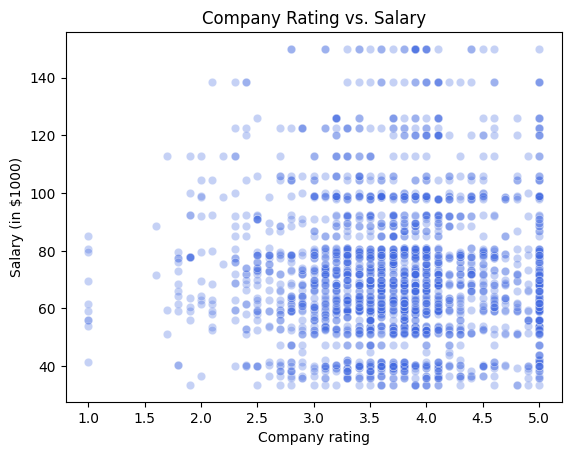

In [83]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='rating', y='average_salary', ax=ax, alpha=0.3, color='royalblue')

ax.set_title('Company Rating vs. Salary')
ax.set_xlabel('Company rating')
ax.set_ylabel('Salary (in $1000)')

plt.show()

The scatter plot illustrates the relationship between company ratings and salaries, showing a wide distribution of salaries across all rating levels. While most salaries cluster between 50K and 100K regardless of rating, there are higher salary outliers above 120K, particularly at the higher end of the rating scale. The plot suggests that while higher-rated companies tend to offer a broad range of salaries, high salaries are not exclusively tied to the highest company ratings.

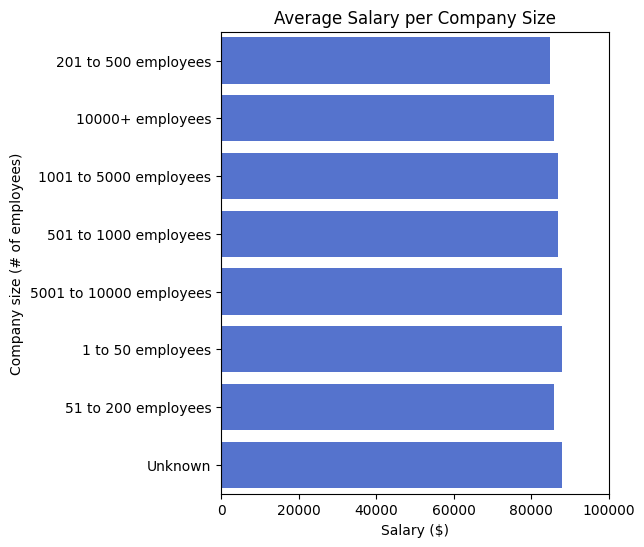

In [84]:
size_salary = df.groupby('size')['max_salary'].median() * 1000

fig, ax = plt.subplots(figsize=(5,6))

sns.barplot(x=size_salary.values, y=size_salary.index, order=df['size'], color='royalblue', ax=ax)
ax.set_title('Average Salary per Company Size')
ax.set_xlabel('Salary ($)')
ax.set_ylabel('Company size (# of employees)')
ax.set_xlim(right=100_000)
plt.show()

The size of the company doesn't mean much in term of the salary for a data analyst job.

In [85]:
def plot_salary(y, salary, amt=30, title=''):
    l = list(df[y].value_counts().iloc[:amt].index)
    temp = df[df[y].isin(l)]
    
    salary_order = temp.groupby(y)[salary].mean().sort_values(ascending=False).index.values
    
    # Customize the color palette
    palette = sns.color_palette("pastel", len(salary_order))
    
    chart = sns.catplot(data=temp, y=y, x=salary, kind='box', 
                        order=salary_order, 
                        height=10, aspect=1, 
                        palette=palette, 
                        hue=y, legend=False)
    
    plt.title(title)
    plt.show()

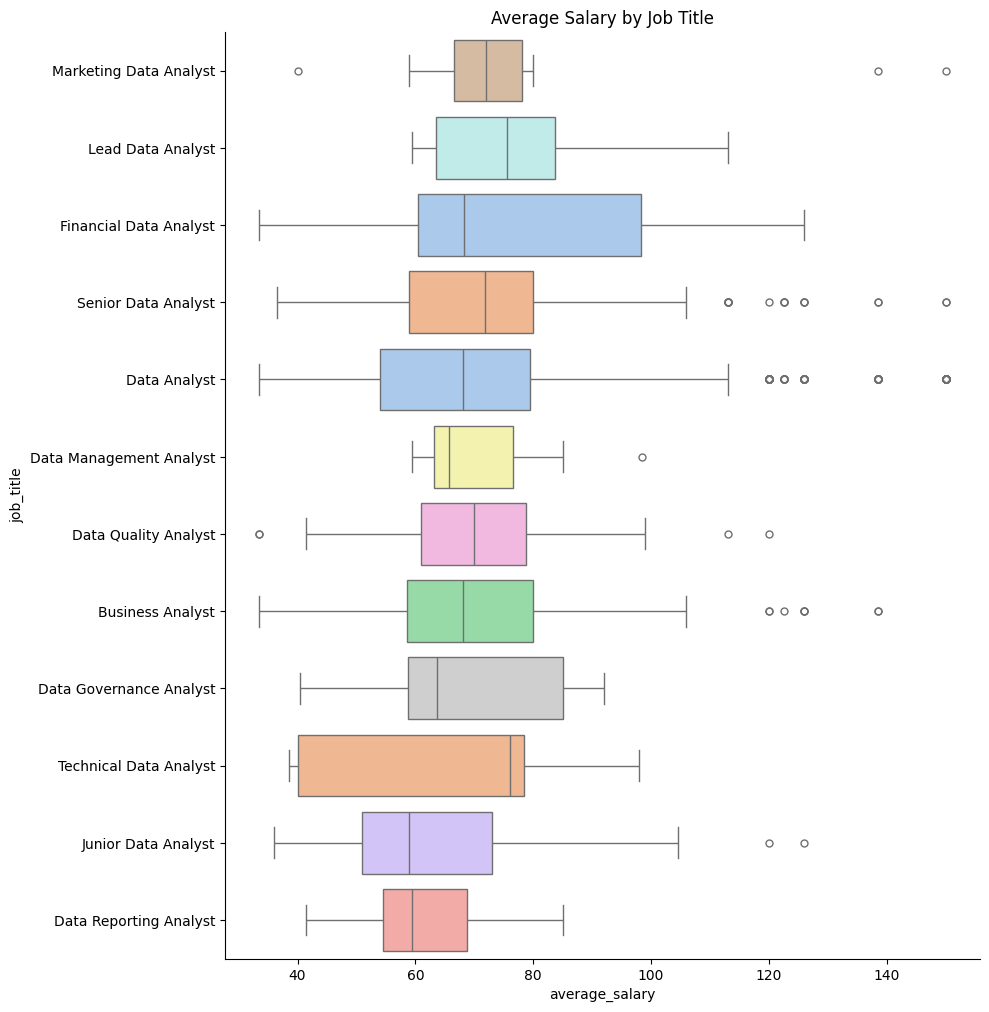

In [86]:
plot_salary('job_title', 'average_salary', amt=12, title='Average Salary by Job Title')

The box plot shows that Senior Data Analyst, Lead Data Analyst, and Technical Data Analyst roles have the highest median salaries and significant variability. Most job titles, including Data Analyst and Financial Data Analyst, have median salaries around $60,000 to $80,000. Lower-paying roles like Data Reporting Analyst and Junior Data Analyst have lower median salaries, indicating a diverse salary range across different data analyst positions

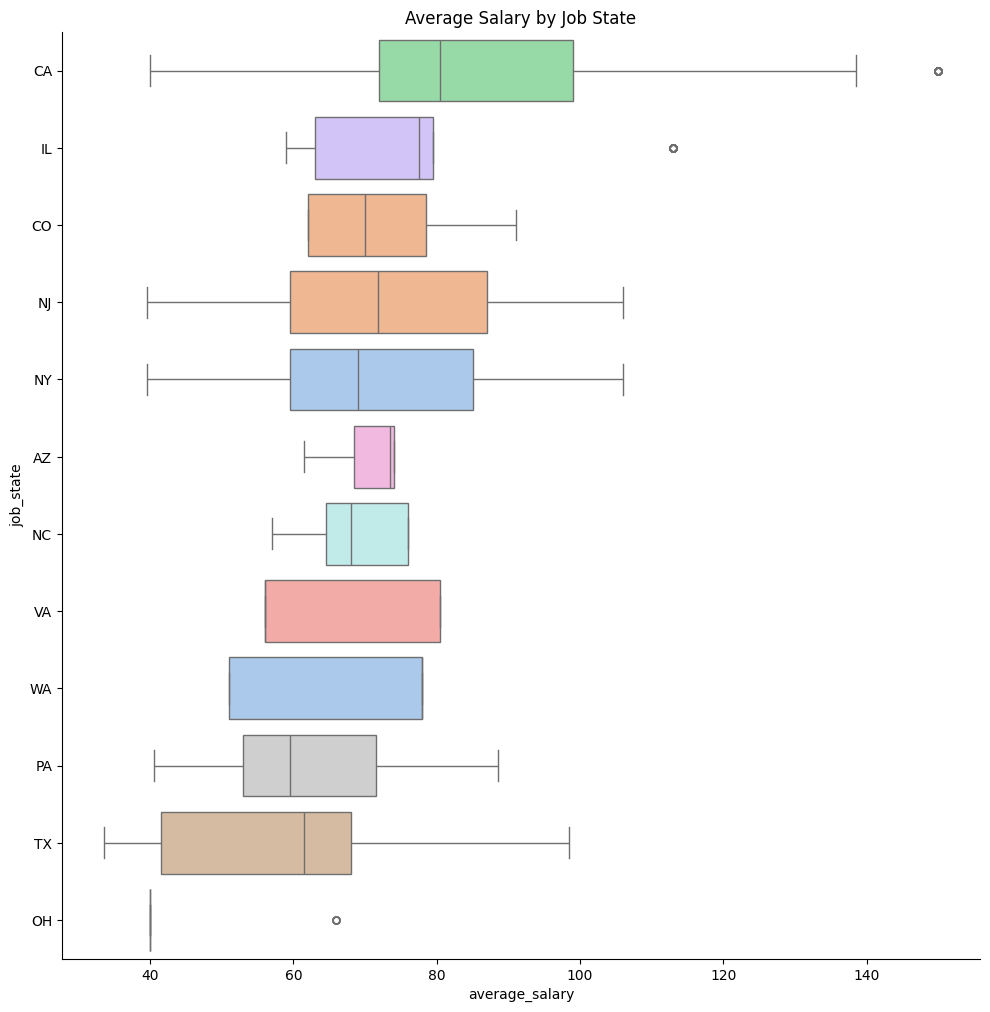

In [87]:
plot_salary('job_state', 'average_salary', amt=12, title='Average Salary by Job State')

The box plot shows average salaries by job state, indicating that California (CA) and New Jersey (NJ) have the highest median salaries and wide variability. States like New York (NY), Virginia (VA), and Washington (WA) also offer high median salaries. Some states, such as Arizona (AZ) and North Carolina (NC), have lower median salaries and smaller salary ranges. There are notable outliers in Illinois (IL) and California (CA), indicating a few exceptionally high salaries.

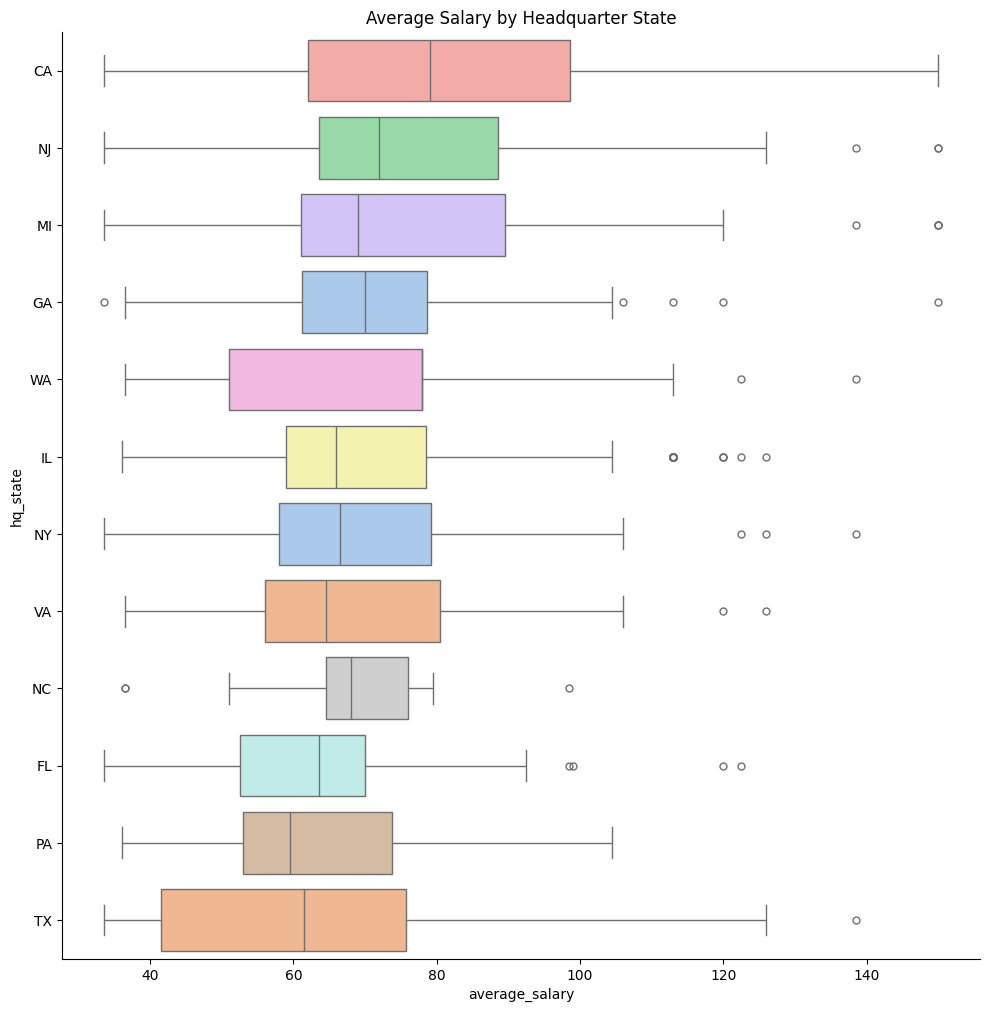

In [88]:
plot_salary('hq_state', 'average_salary', amt=12, title='Average Salary by Headquarter State')

The box plot shows average salaries by headquarters state, with California (CA) and New Jersey (NJ) offering the highest median salaries and considerable salary ranges. States like Michigan (MI), Washington (WA), and New York (NY) also have relatively high median salaries and noticeable variability. North Carolina (NC) and Florida (FL) have lower median salaries and narrower salary ranges. Outliers are present in several states, particularly Illinois (IL) and California (CA), indicating some exceptionally high salaries within those states.

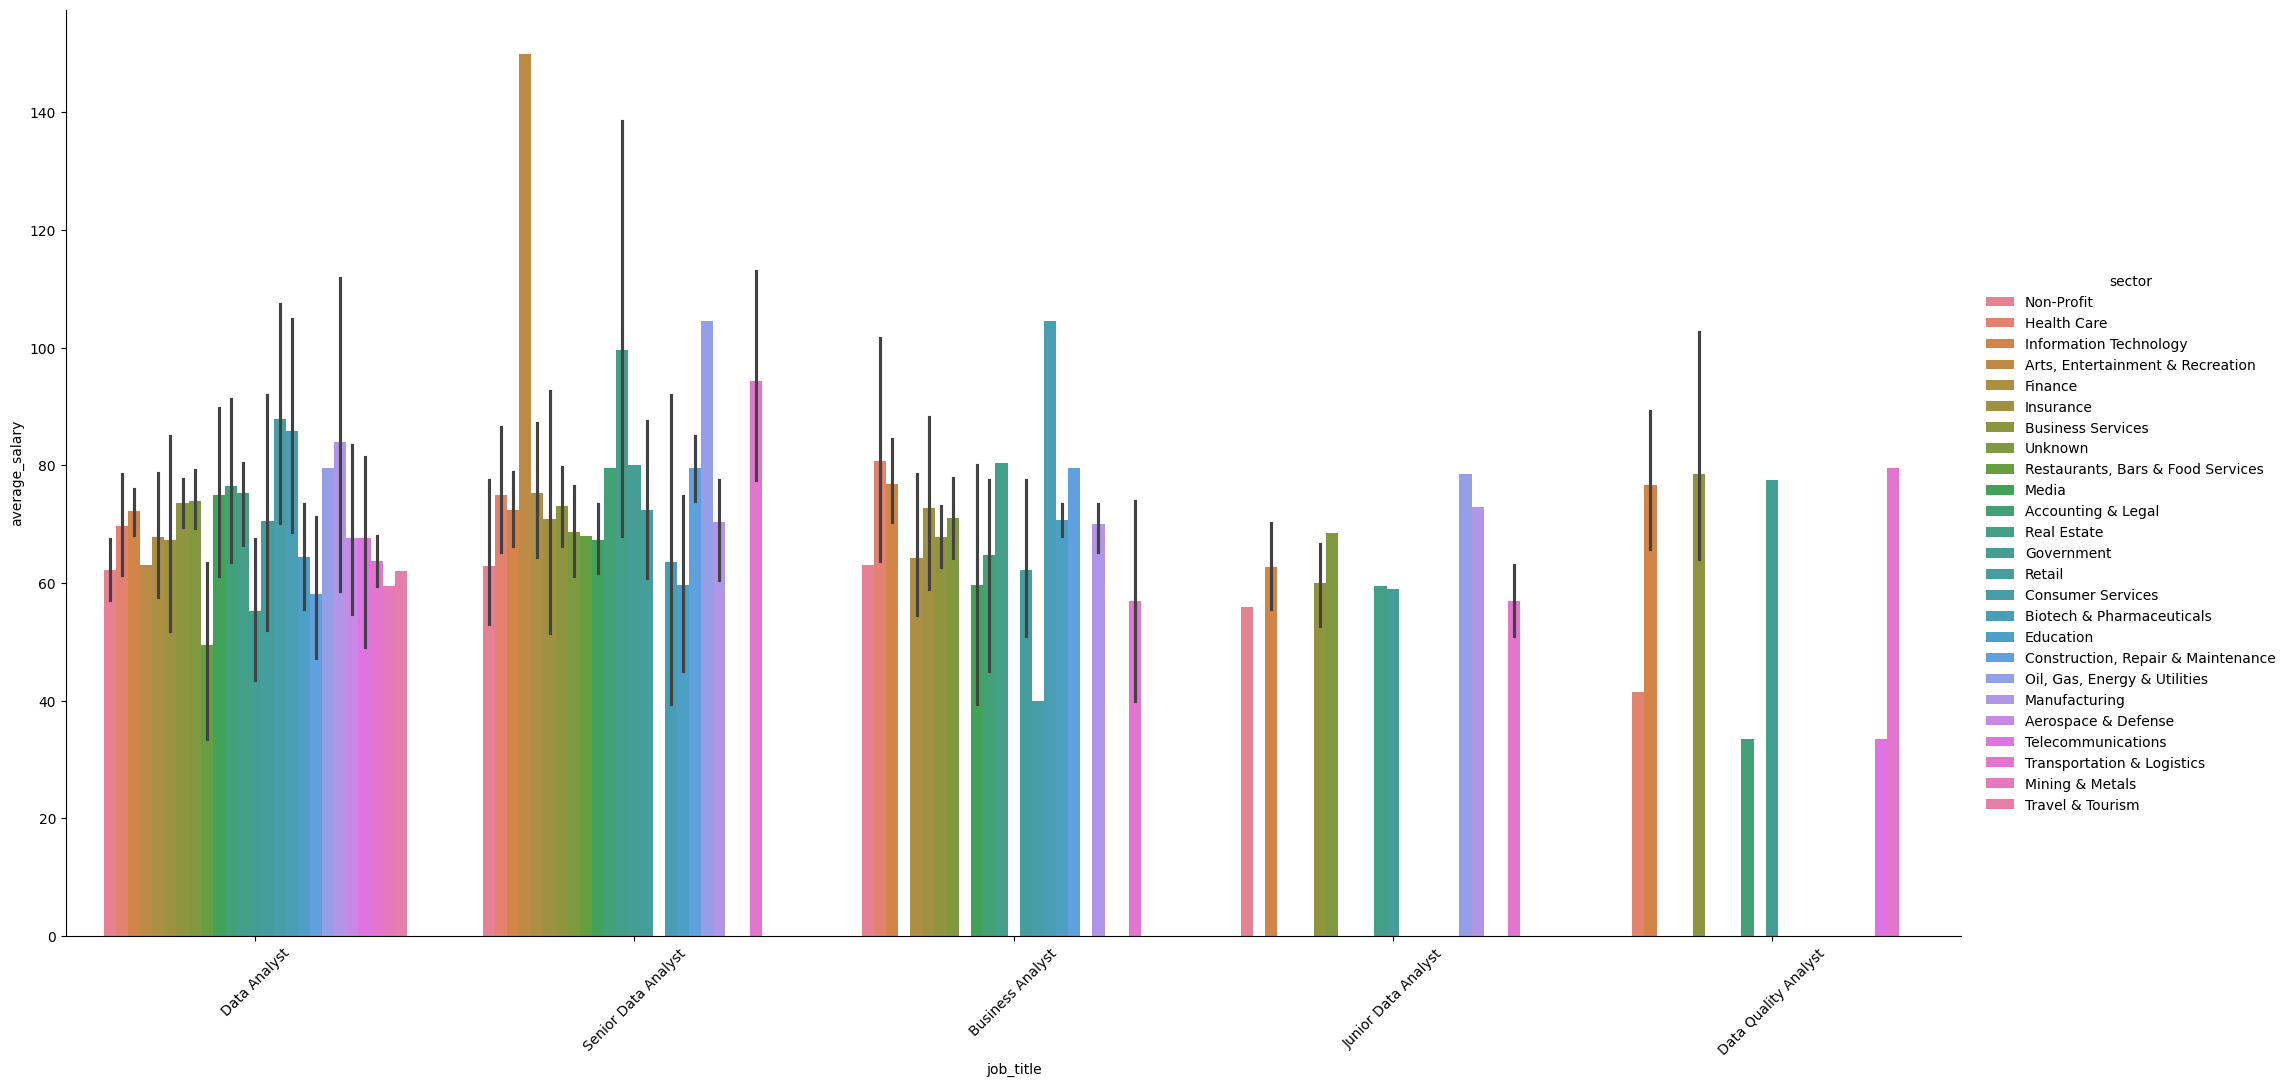

In [89]:
chart = sns.catplot(data=df, x='job_title', y='average_salary', kind='bar', hue='sector',
                    order=df['job_title'].value_counts().iloc[:5].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)

The bar plot shows the average salary for various job titles, categorized by different sectors. It reveals significant variability in salaries within each job title, influenced by the sector. For example, "Senior Data Analyst" roles exhibit higher salary ranges compared to "Junior Data Analyst" roles, with the highest salaries observed in sectors like Information Technology and Finance.

In [90]:
skills = df.groupby("job_title")[['SQL', 'Excel', 'Tableau', 'R','Power BI', 'SAS', 
                                       'Word', 'PowerPoint', 'AWS', 'Python']].sum().sort_values(by="Python", ascending=False)[:10]

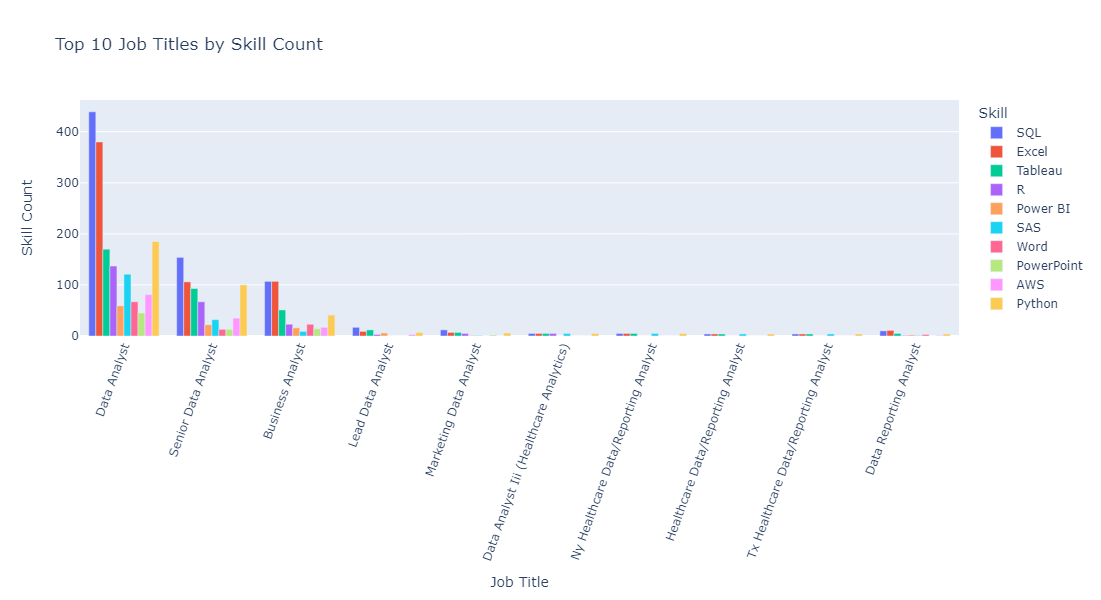

In [91]:
# Preparing the data for Plotly
skills_reset = skills.reset_index().melt(id_vars="job_title", var_name="Skill", value_name="Count")

# Creating the bar plot with Plotly
fig = px.bar(skills_reset, x='job_title', y='Count', color='Skill', barmode='group',
             title="Top 10 Job Titles by Skill Count", 
             labels={'job_title': 'Job Title', 'Count': 'Skill Count'},
             height=600, width=1000)

# Customizing the layout
fig.update_layout(xaxis_tickangle=-70)

# Display the plot
fig.show()

The bar plot shows the top 10 job titles by skill count, with "Data Analyst" having the highest overall skill count across all listed skills. Notably, SQL, Excel, and Python are the most frequently mentioned skills for Data Analyst roles. Other job titles such as "Senior Data Analyst" and "Business Analyst" also require these skills, but to a lesser extent. The plot highlights the demand for a wide range of skills across different job titles, emphasizing the prominence of SQL, Excel, and Python in data-related roles.

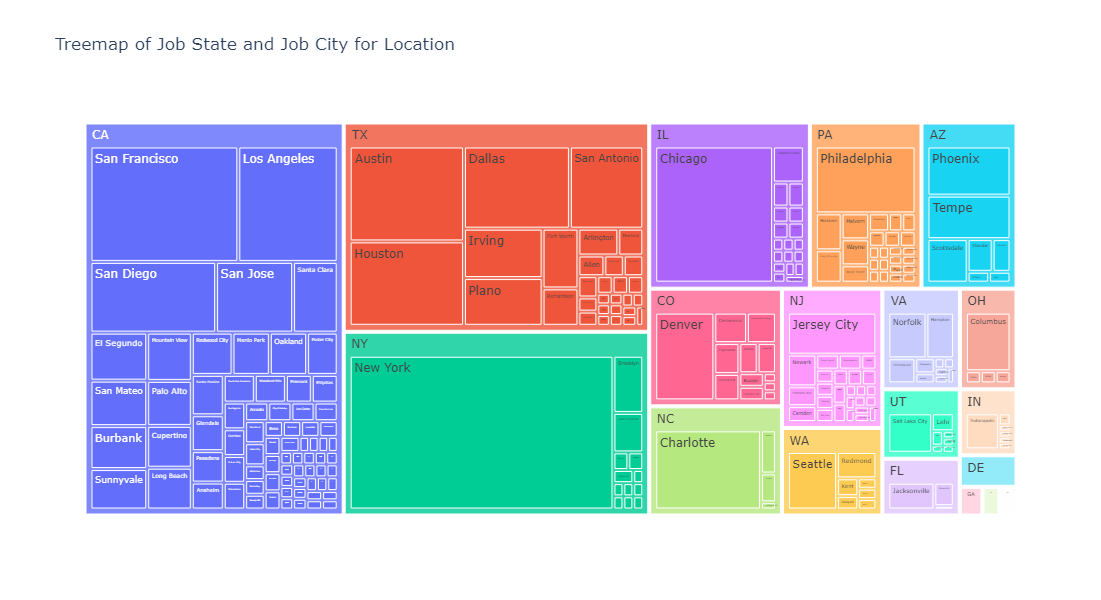

In [92]:
# Count the occurrences of each job_city within each job_state
city_state_counts = df.groupby(['job_state', 'job_city']).size().reset_index(name='count')

# Create the treemap using Plotly
fig = px.treemap(city_state_counts, 
                 path=['job_state', 'job_city'], 
                 values='count', 
                 title='Treemap of Job State and Job City for Location',
                )

# Customize the layout
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

The treemap visualizes job listings by state and city, showing that California (CA) has the highest concentration of job opportunities, particularly in San Francisco and Los Angeles. Texas (TX) and New York (NY), with major cities like Austin, Dallas, and New York City, also have significant job listings. Other states such as Illinois (IL), Pennsylvania (PA), and Arizona (AZ) have notable but smaller clusters of job opportunities.

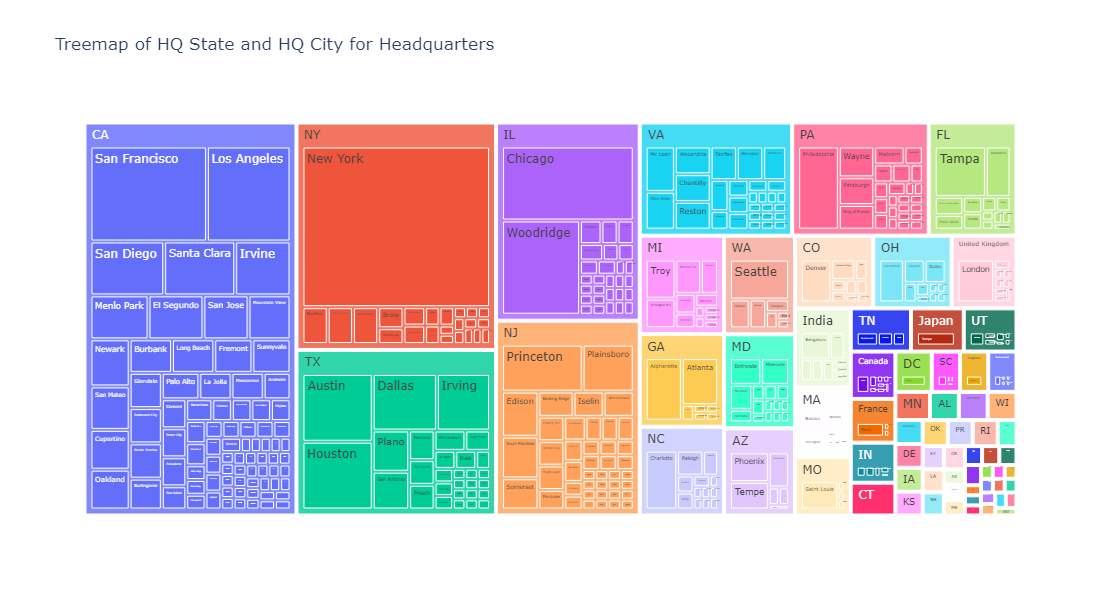

In [93]:
# Count the occurrences of each job_city within each job_state
city_state_counts = df.groupby(['hq_state', 'hq_city']).size().reset_index(name='count')

# Create the treemap using Plotly
fig = px.treemap(city_state_counts, 
                 path=['hq_state', 'hq_city'], 
                 values='count', 
                 title='Treemap of HQ State and HQ City for Headquarters',
                )

# Customize the layout
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

The treemap shows the distribution of company headquarters by state and city, with California (CA) and New York (NY) having the most significant clusters, particularly in San Francisco, Los Angeles, and New York City. Other states like Illinois (IL), Texas (TX), and New Jersey (NJ) also have notable concentrations of company headquarters, with key cities such as Chicago, Austin, Dallas, and Princeton. Smaller clusters are seen across various states and international locations, indicating a diverse spread of company headquarters.

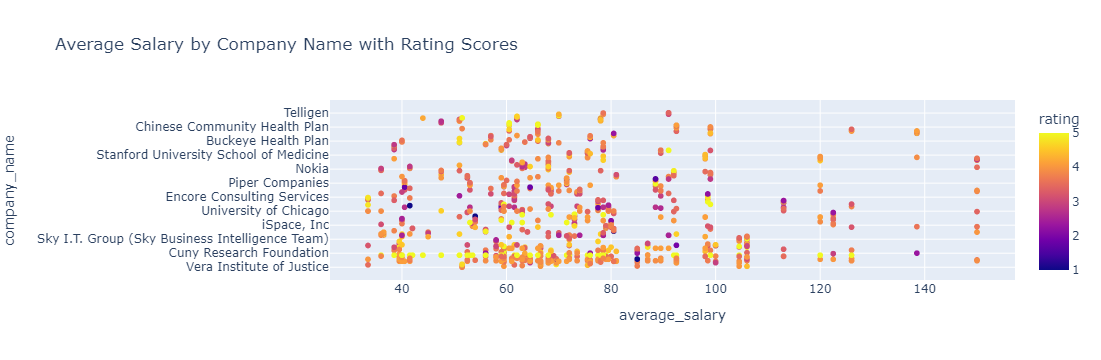

In [94]:
fig = px.scatter(df, 
                 x='average_salary', 
                 y='company_name', 
                 color='rating', 
                 hover_data=['sector', 'job_title'], 
                 title = 'Average Salary by Company Name with Rating Scores')
fig.show()

The scatter plot visualizes the average salary by company name, with each point representing a company's average salary for a job posting. The color of each point indicates the company's rating score, with a color gradient from purple (low ratings) to yellow (high ratings). Companies like Telligen and Chinese Community Health Plan show a wide range of salaries, with varying ratings. The plot highlights the relationship between company ratings and average salaries, showing that high salaries are spread across different rating scores.

### Cluster analysis

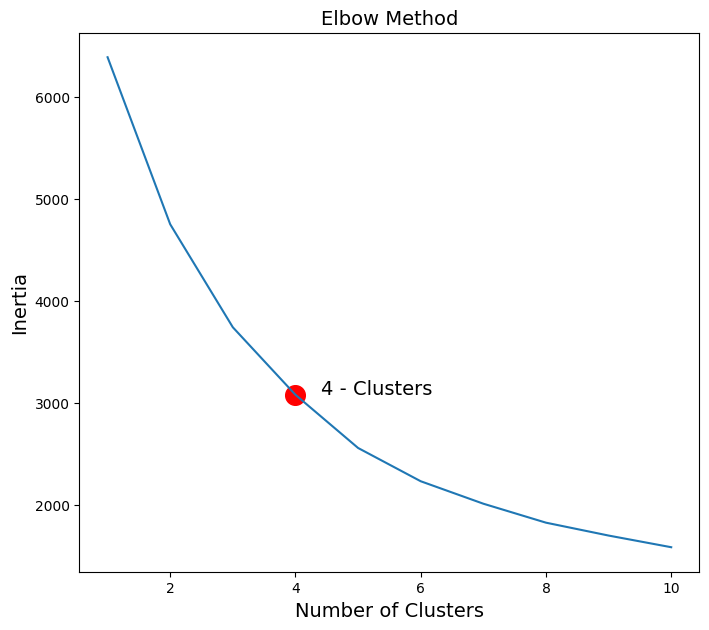

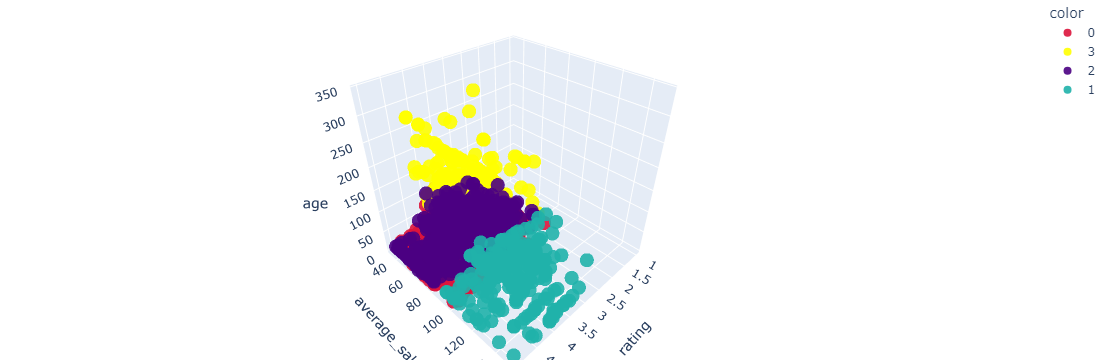

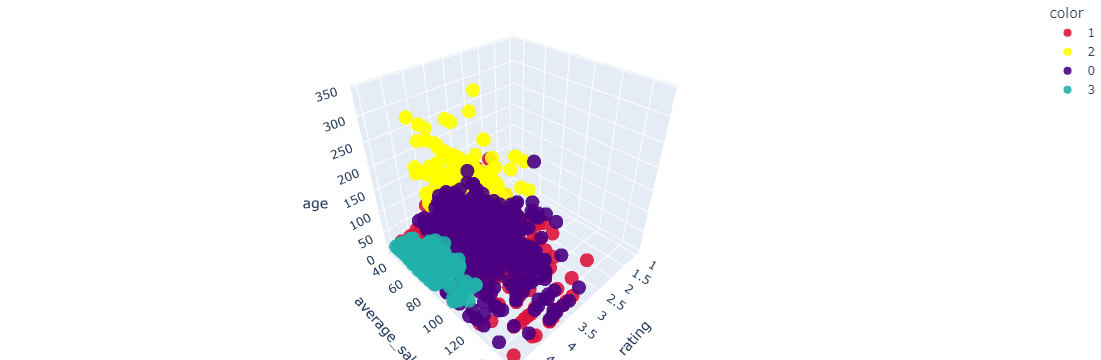

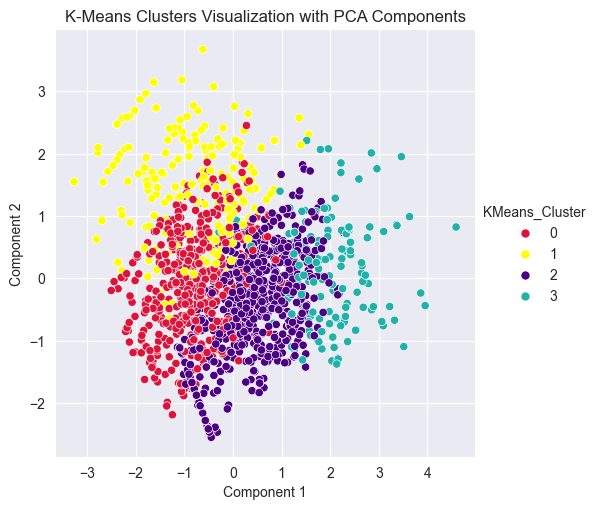

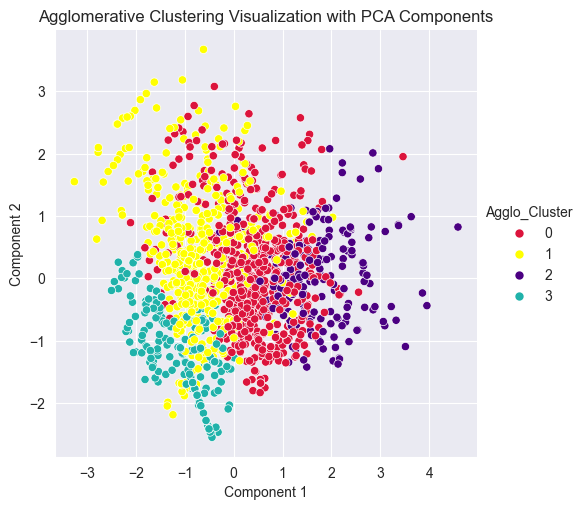

In [95]:
# Preprocess Data: Select relevant features and handle missing values
df = df.drop(df[df['age'] == -1].index, axis=0)
df = df.drop(df[df['rating'] == -1.0].index, axis=0)

# Create DataFrame with selected features
df_cluster = df[['rating', 'average_salary', 'age', 'No_degree']]

# Rescale values with StandardScaler
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# PCA calculation with a reduction of dimensionality to 2 components
pca = PCA(n_components=2)
df_component = pca.fit_transform(df_cluster_scaled)

# Determine the optimal number of clusters using the Elbow Method for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
fig = plt.figure(figsize=(8,7))
plt.plot(range(1, 11), wcss)
plt.scatter(4, wcss[3], c='red', s=200)
plt.text(4 + 0.4, wcss[3], s='4 - Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method', fontsize=14)
plt.show()

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(df_cluster_scaled)
y_predict_kmeans = kmeans.predict(df_cluster_scaled)
df['kmeans_cluster'] = y_predict_kmeans

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
y_predict_agglo = agglo.fit_predict(df_cluster_scaled)
df['agglo_cluster'] = y_predict_agglo

# Plot K-Means Clusters
colors = ['crimson', 'yellow', 'indigo', 'lightseagreen']

fig3d_kmeans = px.scatter_3d(df, x='rating', y='average_salary', z='age',
                             color=df['kmeans_cluster'].astype(str),
                             color_discrete_sequence=colors, opacity=0.9, size_max=5)
fig3d_kmeans.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig3d_kmeans.show()

# Plot Agglomerative Clustering Clusters
fig3d_agglo = px.scatter_3d(df, x='rating', y='average_salary', z='age',
                            color=df['agglo_cluster'].astype(str),
                            color_discrete_sequence=colors, opacity=0.9, size_max=5)
fig3d_agglo.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig3d_agglo.show()

# Create DataFrame for PCA components and cluster predictions
dfsns = pd.DataFrame(df_component, columns=['Component 1', 'Component 2'])
dfsns['KMeans_Cluster'] = y_predict_kmeans
dfsns['Agglo_Cluster'] = y_predict_agglo

# Plot PCA components with K-Means clusters
sns.set_style('darkgrid')
sns.relplot(x='Component 1', y='Component 2', hue='KMeans_Cluster', data=dfsns, palette=colors)
plt.title('K-Means Clusters Visualization with PCA Components')
plt.show()

# Plot PCA components with Agglomerative Clustering clusters
sns.relplot(x='Component 1', y='Component 2', hue='Agglo_Cluster', data=dfsns, palette=colors)
plt.title('Agglomerative Clustering Visualization with PCA Components')
plt.show()

# This code preprocesses a dataset by removing rows with missing values in the age and rating columns and selects relevant features (rating, average_salary, age, No_degree). 
# It standardizes these features and reduces their dimensionality using PCA. 
# The code then determines the optimal number of clusters for K-Means using the elbow method and applies both K-Means and Agglomerative Clustering, assigning the cluster labels to the dataset.
# Finally, it visualizes the clusters in 3D using Plotly and in 2D using PCA components with Seaborn.

Elbow Method Plot:
The plot shows the Elbow Method for determining the optimal number of clusters for K-means clustering.
The x-axis represents the number of clusters, and the y-axis shows the inertia, a measure of within-cluster sum of squares.
The red dot at 4 clusters indicates the optimal number of clusters where the elbow occurs, suggesting the best trade-off between inertia and number of clusters.

3D Scatter Plot of K-Means Clusters and the 3D Scatter Plot of Agglomerative Clustering
Different colors represent different clusters, with four distinct clusters showing the hierarchical clustering results.

PCA Components Visualization with K-Means Clusters:
This 2D scatter plot shows the PCA components after dimensionality reduction to visualize K-means clusters.
The x-axis represents the first principal component, and the y-axis represents the second principal component.
Different colors denote the four clusters identified by K-means, providing a clear view of cluster separation in reduced dimensions.

PCA Components Visualization with Agglomerative Clustering:
This 2D scatter plot displays the PCA components to visualize Agglomerative Clustering results.
The x-axis is the first principal component, and the y-axis is the second principal component.
The plot uses different colors to indicate the four clusters formed by Agglomerative Clustering, showing how clusters are distributed in the reduced dimensional space.

In [96]:
dfsns.head(10)

Component 1  Component 2  KMeans_Cluster  Agglo_Cluster
0     0.422872     0.001940               0              1
1     1.782543    -0.644091               3              2
2     0.692423    -0.553025               2              0
3     0.132617    -1.187438               2              0
4     0.206047    -1.022833               2              0
5     0.141621    -1.035236               2              0
6    -0.099937    -1.457911               2              3
7     1.593767    -0.605200               3              2
8     0.605906    -0.564696               3              1
9    -0.254559    -1.487679               2              3

Component 1 and Component 2: These columns show how the data points are represented in a new 2-dimensional space after PCA. Each row corresponds to a data point's coordinates in this space.
KMeans_Cluster: Indicates the cluster to which each data point belongs according to the K-means clustering algorithm.
Agglo_Cluster: Indicates the cluster to which each data point belongs according to the Agglomerative Clustering algorithm.

In [97]:
# Dataframe with cluster classification
df_predict = pd.DataFrame(y_predict_kmeans, columns=['Cluster'])
df3_scaler = pd.DataFrame(df_cluster_scaled, columns=['Rating', 'Mean Salary', 'Age', 'No_degree'])
df3_scaler['Cluster'] = df_predict['Cluster']
df3_scaler['Cluster'] = df3_scaler['Cluster'].replace(
    {0: 'Cluster-1', 1: 'Cluster-2', 2: 'Cluster-3', 3: 'Cluster-4'}
)
df3_scaler.head()

Rating  Mean Salary       Age  No_degree    Cluster
0 -0.881845    -0.858881  0.364834   1.166368  Cluster-1
1  0.087224    -0.858881  1.788893  -0.857363  Cluster-4
2 -0.558822    -0.858881 -0.514731  -0.857363  Cluster-3
3  0.571759    -0.858881 -0.493789  -0.857363  Cluster-3
4  0.248736    -0.858881 -0.640384  -0.857363  Cluster-3

In [98]:
# Groupby apply
df_cluster_group = df3_scaler.groupby('Cluster').mean()
df_cluster_group.head(df_cluster_group.shape[0])

Rating  Mean Salary       Age  No_degree
Cluster                                              
Cluster-1  0.118085    -0.160283 -0.334817   1.166368
Cluster-2  0.120098     1.827771 -0.238037  -0.194725
Cluster-3 -0.074039    -0.406615 -0.246956  -0.857363
Cluster-4 -0.279939    -0.364044  2.497281  -0.316863